# BL

## 1.load data & QC

In [1]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [2]:
samples <- c('a3026-1-10XSC3','a3028-3-10XSC3','a3030-2-10XSC3')

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


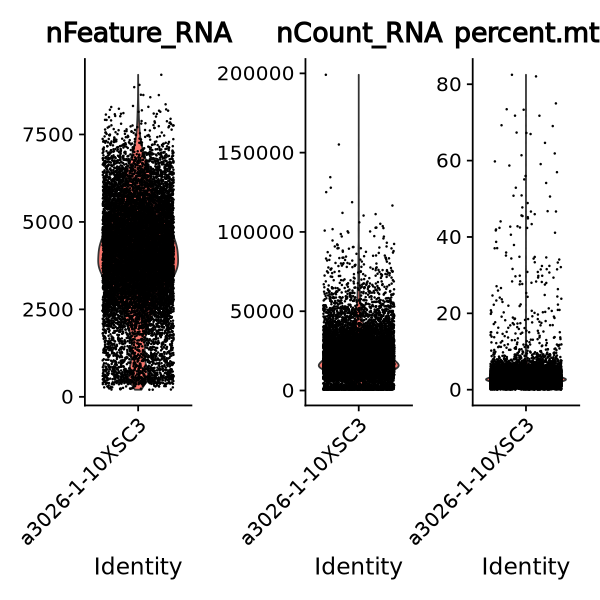

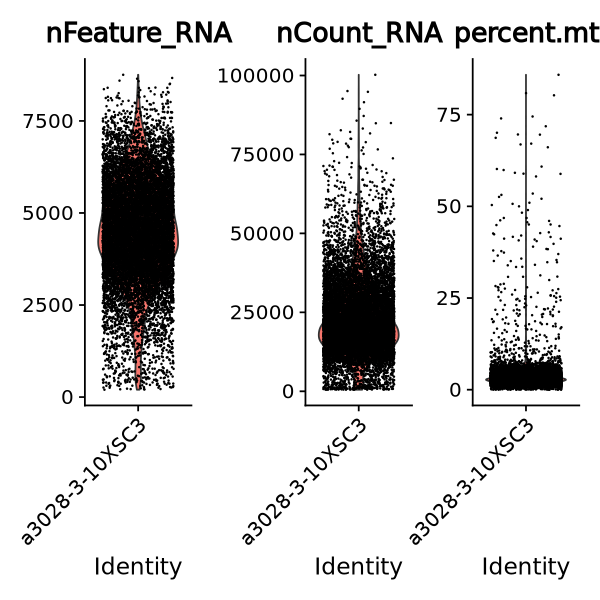

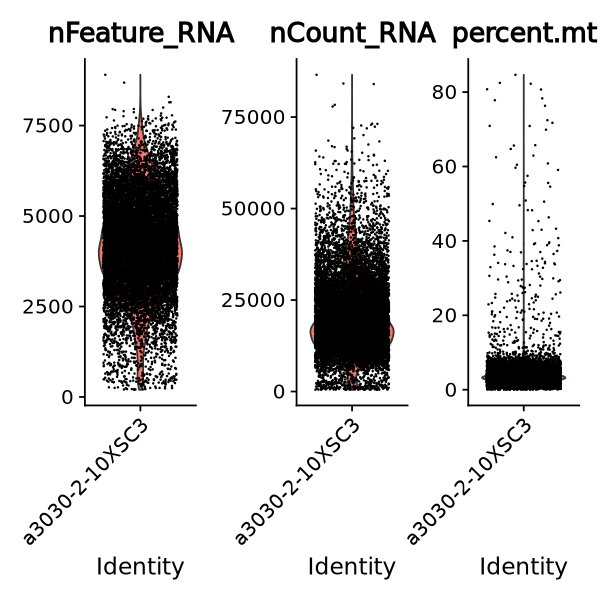

In [3]:
sc.all <- lapply(samples,function(sample){
    sc.data <- Read10X(data.dir = paste0('/data/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T1/',
                                         sample,'/outs/filtered_feature_bc_matrix'))
    sc = CreateSeuratObject(counts = sc.data,project=sample,min.cells = 3,min.features = 200)
    sc[["percent.mt"]] <- PercentageFeatureSet(sc,pattern = '^mt-')
    options(repr.plot.width = 5, repr.plot.height = 5)
    plot <- VlnPlot(sc,features=c("nFeature_RNA",'nCount_RNA','percent.mt'),ncol=3)
    print(plot)
    return(sc)  
})

In [4]:
sc.all <- lapply(sc.all,function(sc){
    sc <- subset(sc, subset =nFeature_RNA > 1000 & nFeature_RNA < 7500 & percent.mt < 10)
    return(sc)
})


In [5]:
sc.all

[[1]]
An object of class Seurat 
21179 features across 12403 samples within 1 assay 
Active assay: RNA (21179 features, 0 variable features)
 1 layer present: counts

[[2]]
An object of class Seurat 
21769 features across 11983 samples within 1 assay 
Active assay: RNA (21769 features, 0 variable features)
 1 layer present: counts

[[3]]
An object of class Seurat 
21402 features across 12510 samples within 1 assay 
Active assay: RNA (21402 features, 0 variable features)
 1 layer present: counts


## 2.preprocessing

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  Pclaf, Top2a, Birc5, Cks1b, H2afz, Smc2, Hmgb1, Tk1, Mki67, Tuba1b 
	   Tyms, Ccna2, Hmgb2, Tubb6, Spc24, Diaph3, Smc4, Hist1h1e, Cdk1, Ccnd1 
	   Hnrnpa2b1, Dek, Stmn1, AI506816, Hist1h2ap, Cenpf, Cenpe, Ranbp1, Atad2, Hist1h1b 
Negative:  Ftl1, 2410006H16Rik, Gas5, Lgals3, 1110038B12Rik, Rpl22l1, Zfas1, Aqp5, Ero1l, Snhg12 
	   Snhg20, Nupr1, Rps15, Rpl38, Jund, Pgrmc1, Gm42418, Bnip3, Bsg, Ndrg1 
	   Cited2, Hist1h1c, Ddit3, Thbs1, Mt1, Ccn2, Rgcc, Akr1c18, Krt19, 4930447F24Rik 
PC_ 2 
Positive:  Snhg1, Ube2c, Nme2, Birc5, Cks2, Tubb5, 2410006H16Rik, Hmgb2, Gas5, Cdca8 
	   Rpl38, Snhg12, 1110038B12Rik, Ube2s, Cdk1, Ccnb1, 5430416N02Rik, Cenpf, Ccna2, Cdc20 
	   Hmmr, Cenpa, Racgap1, Tpx2, Ran, Nusap1, Snhg16, Ftl1, Top2a, Pclaf 
Negative:  Airn, Pde4d, Col4a5, Slc7a2, Cdk14, Gpc6, Pbx1, Atxn1, Cp, Ptprm 
	   Zfpm2, Mecom, Maml3, Ank, Neat1, Peak1, Prune2, Maml

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12403
Number of edges: 379631

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8971
Number of communities: 5
Elapsed time: 2 seconds


17:07:19 UMAP embedding parameters a = 0.9922 b = 1.112

17:07:19 Read 12403 rows and found 15 numeric columns

17:07:19 Using Annoy for neighbor search, n_neighbors = 30

17:07:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:07:20 Writing NN index file to temp file /tmp/RtmpUsiBYU/file5a2b27d92930d

17:07:20 Searching Annoy index using 1 thread, search_k = 3000

17:07:24 Annoy recall = 100%

17:07:24 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:07:26 Initializing from normalized Laplacian + noise (using RSpectra)

17:07:26 Commencing optimization for 200 epochs, with 510170 positive edges

17:07:41 Optimization finished

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling dat

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11983
Number of edges: 363749

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8980
Number of communities: 7
Elapsed time: 1 seconds


17:08:31 UMAP embedding parameters a = 0.9922 b = 1.112

17:08:31 Read 11983 rows and found 15 numeric columns

17:08:31 Using Annoy for neighbor search, n_neighbors = 30

17:08:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:08:32 Writing NN index file to temp file /tmp/RtmpUsiBYU/file5a2b255457913

17:08:32 Searching Annoy index using 1 thread, search_k = 3000

17:08:36 Annoy recall = 100%

17:08:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:08:38 Initializing from normalized Laplacian + noise (using RSpectra)

17:08:38 Commencing optimization for 200 epochs, with 488356 positive edges

17:08:53 Optimization finished

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling dat

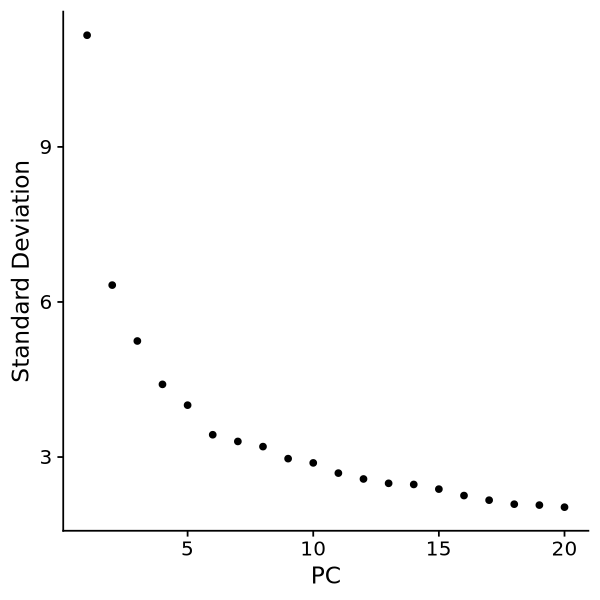

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12510
Number of edges: 380445

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9008
Number of communities: 6
Elapsed time: 1 seconds


17:09:47 UMAP embedding parameters a = 0.9922 b = 1.112

17:09:47 Read 12510 rows and found 15 numeric columns

17:09:47 Using Annoy for neighbor search, n_neighbors = 30

17:09:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:09:48 Writing NN index file to temp file /tmp/RtmpUsiBYU/file5a2b21d841894

17:09:48 Searching Annoy index using 1 thread, search_k = 3000

17:09:51 Annoy recall = 100%

17:09:52 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:09:54 Initializing from normalized Laplacian + noise (using RSpectra)

17:09:54 Commencing optimization for 200 epochs, with 515080 positive edges

17:10:09 Optimization finished



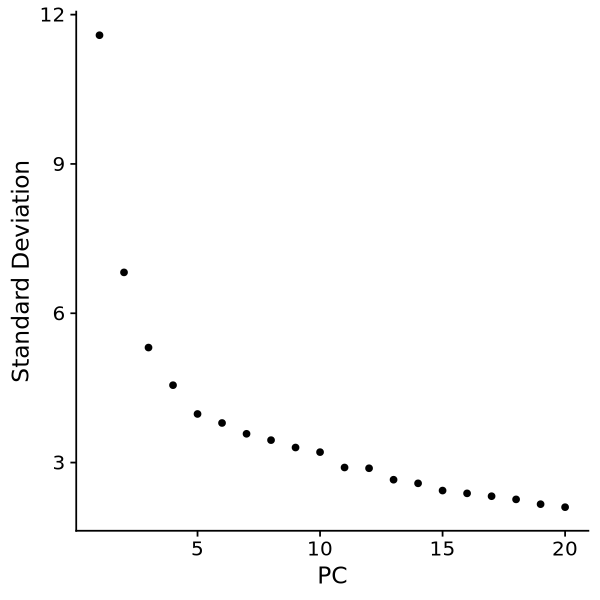

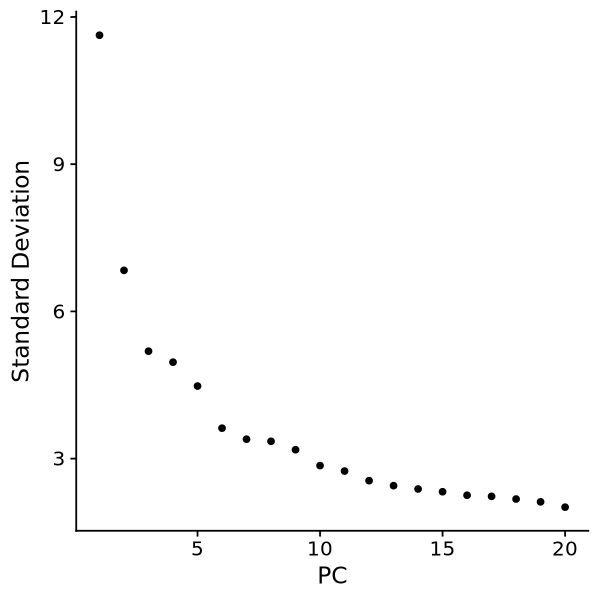

In [158]:
set.seed(0)
sc.all <- lapply(sc.all,function(sc){
    sc <- NormalizeData(sc)
    sc <- FindVariableFeatures(sc, selection.method = "vst", nfeatures = 2000)
    all.genes <- rownames(sc)
    sc <- ScaleData(sc, features = all.genes)
    sc <- RunPCA(sc,features = VariableFeatures(object = sc))
    plot <- ElbowPlot(sc)
    print(plot)
    sc <- FindNeighbors(sc, dims = 1:15,)
    sc <- FindClusters(sc, resolution = 0.2)
    #sc <- RunTSNE(sc, dims = 1:20)
    sc <- RunUMAP(sc, dims = 1:15)
    return(sc)
})

## 3.remove doublet

In [159]:
library(DoubletFinder)

In [160]:
sc.all[[1]][["RNA"]] <- as(object = sc.all[[1]][["RNA"]], Class = "Assay")
sc.all[[2]][["RNA"]] <- as(object = sc.all[[2]][["RNA"]], Class = "Assay")
sc.all[[3]][["RNA"]] <- as(object = sc.all[[3]][["RNA"]], Class = "Assay")

Warning message:
“Assay RNA changing from Assay5 to Assay”
Warning message:
“Assay RNA changing from Assay5 to Assay”
Warning message:
“Assay RNA changing from Assay5 to Assay”


Loading required package: fields

Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridisLite


Try help(fields) to get started.



[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ROCR



NULL
[1] "Creating 4134 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



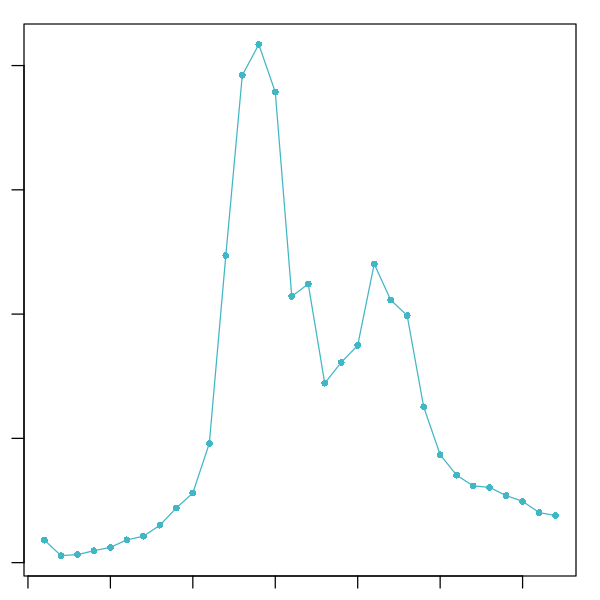

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
NULL
[1] "Creating 3994 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



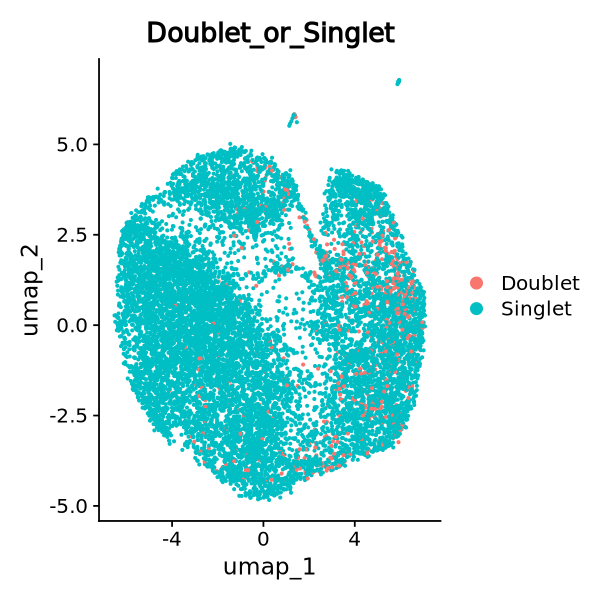

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



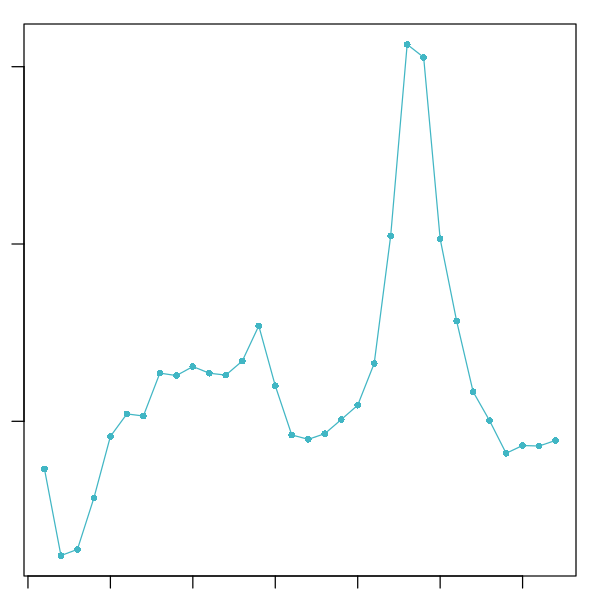

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
NULL
[1] "Creating 4170 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



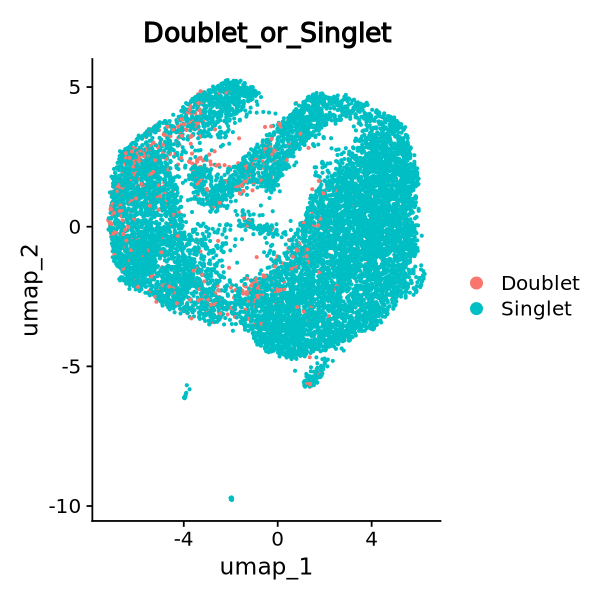

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


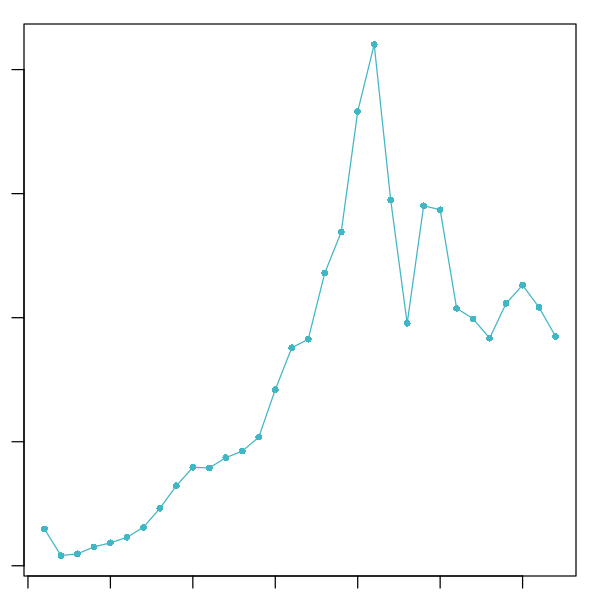

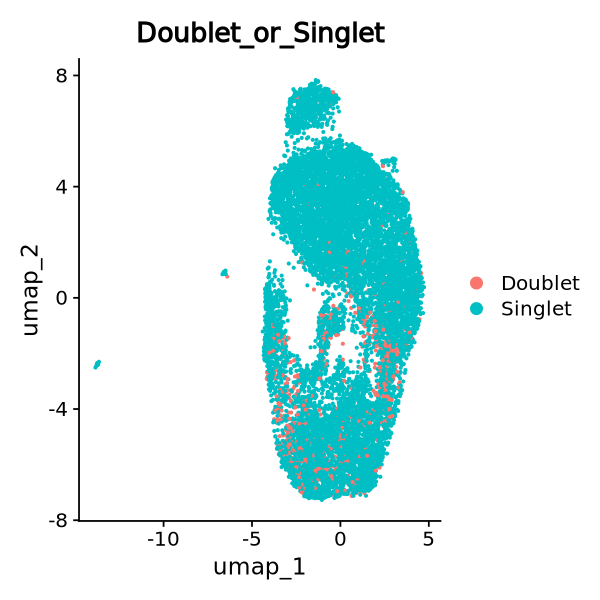

In [161]:
sc.all <- lapply(sc.all,function(sc){
    sweep.res.list <- paramSweep_v3(sc, PCs = 1:15, sct = FALSE)
    sweep.stats <- summarizeSweep(sweep.res.list, GT = FALSE)
    bcmvn <- find.pK(sweep.stats)
    mpK<-as.numeric(as.vector(bcmvn$pK[which.max(bcmvn$BCmetric)]))
    nExp_poi <- round(0.08*nrow(sc@meta.data)) 
    homotypic.prop <- modelHomotypic(sc@meta.data$seurat_clusters)  
    nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))
    sc <- doubletFinder_v3(sc, PCs = 1:15, pN = 0.25, pK = mpK, nExp = nExp_poi.adj, reuse.pANN = F, sct = FALSE)
    colnames(sc@meta.data)[ncol(sc@meta.data)] = "Doublet_or_Singlet"
    plot <- DimPlot(sc, reduction = "umap", group.by = 'Doublet_or_Singlet', pt.size = 0.5) 
    print(plot)   
    sc <- subset(sc,subset=Doublet_or_Singlet=="Singlet")
    return(sc)
})

In [162]:
sc.all

[[1]]
An object of class Seurat 
21179 features across 11811 samples within 1 assay 
Active assay: RNA (21179 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

[[2]]
An object of class Seurat 
21769 features across 11383 samples within 1 assay 
Active assay: RNA (21769 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

[[3]]
An object of class Seurat 
21402 features across 11768 samples within 1 assay 
Active assay: RNA (21402 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


In [163]:
print('finished')

[1] "finished"


## 4.merge

In [164]:
sc.all[[1]][["RNA"]] <- as(object = sc.all[[1]][["RNA"]], Class = "Assay5")
sc.all[[2]][["RNA"]] <- as(object = sc.all[[2]][["RNA"]], Class = "Assay5")
sc.all[[3]][["RNA"]] <- as(object = sc.all[[3]][["RNA"]], Class = "Assay5")

sc.all.merge <- merge(sc.all[[1]], 
                 y = sc.all[2:3], 
                 add.cell.ids = c('T1_a3026','T1_a3028','T1_a3030'), 
                 project = "sc_T1")

Warning message:
“Assay RNA changing from Assay to Assay5”
Warning message:
“Assay RNA changing from Assay to Assay5”
Warning message:
“Assay RNA changing from Assay to Assay5”


In [165]:
sc.all.merge

An object of class Seurat 
22691 features across 34962 samples within 1 assay 
Active assay: RNA (22691 features, 2000 variable features)
 9 layers present: data.a3026-1-10XSC3, data.a3028-3-10XSC3, data.a3030-2-10XSC3, counts.a3026-1-10XSC3, scale.data.a3026-1-10XSC3, counts.a3028-3-10XSC3, scale.data.a3028-3-10XSC3, counts.a3030-2-10XSC3, scale.data.a3030-2-10XSC3

In [166]:
saveRDS(sc.all.merge, file = "/data/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T1/sc.all.merge.rds")

In [167]:
saveRDS(sc.all.merge, file = "/synology/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T1/sc.all.merge.rds")

In [168]:
print('finished')

[1] "finished"


## 6.clone projection on umap

In [1]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [2]:
sc.T1 <- readRDS('/synology/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T1/sc.all.merge.rds')

In [3]:
sc.T1 

An object of class Seurat 
22691 features across 34854 samples within 1 assay 
Active assay: RNA (22691 features, 2000 variable features)
 9 layers present: data.a3026-1-10XSC3, data.a3028-3-10XSC3, data.a3030-2-10XSC3, counts.a3026-1-10XSC3, scale.data.a3026-1-10XSC3, counts.a3028-3-10XSC3, scale.data.a3028-3-10XSC3, counts.a3030-2-10XSC3, scale.data.a3030-2-10XSC3

In [4]:
cell_lineage <- read.table('/synology/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.csv',header = T,row.names = 1,sep=',')
sc.T1@meta.data[sc.T1@meta.data$orig.ident=='a3026-1-10XSC3','orig.ident'] <- 'T1_a3026'
sc.T1@meta.data[sc.T1@meta.data$orig.ident=='a3028-3-10XSC3','orig.ident'] <- 'T1_a3028'
sc.T1@meta.data[sc.T1@meta.data$orig.ident=='a3030-2-10XSC3','orig.ident'] <- 'T1_a3030'
cellBCs <- c()
for (cellBC in rownames(sc.T1@meta.data)){
    cellBC <- substr(cellBC,nchar(cellBC)-1-16,nchar(cellBC)-2)
    cellBCs <- c(cellBCs,cellBC)
}
sc.T1@meta.data$cellName <- paste0(sc.T1@meta.data$orig.ident,'_',cellBCs)

In [5]:
sc.T1@meta.data

orig.ident nCount_RNA nFeature_RNA percent.mt
T1_a3026_AAACCCAAGACTAGAT-1 T1_a3026   23101      4348         5.6534349 
T1_a3026_AAACCCACATGAGATA-1 T1_a3026   13159      3546         2.0290296 
T1_a3026_AAACCCAGTCGCTGCA-1 T1_a3026   15441      3362         5.9840684 
T1_a3026_AAACCCAGTCTCGCGA-1 T1_a3026   87500      7440         4.8742857 
T1_a3026_AAACCCATCACGGGAA-1 T1_a3026   22915      3939         4.2330351 
T1_a3026_AAACCCATCGCTTACC-1 T1_a3026   16459      4443         1.6951212 
T1_a3026_AAACGAAAGATGAAGG-1 T1_a3026   41955      5372         2.9293290 
T1_a3026_AAACGAAAGATGGCGT-1 T1_a3026   23998      4543         3.2752729 
T1_a3026_AAACGAAAGGATACAT-1 T1_a3026   19233      3932         3.7227682 
T1_a3026_AAACGAAAGGCTGTAG-1 T1_a3026   35023      5799         4.9710190 
T1_a3026_AAACGAACACAATGAA-1 T1_a3026   33450      5284         3.9252616 
T1_a3026_AAACGAACAGCCGTTG-1 T1_a3026   14111      3047         1.5236340 
T1_a3026_AAACGAAGTAGAGACC-1 T1_a3026   16365      3519         1.6009777 
T1_a3026_AAACGAAGTAGCCAGA-1 T1_a3026   32981      4663         3.8173494 
T1_a3026_AAACGAAGTCATATGC-1 T1_a3026   25254      4950         2.7441197 
T1_a3026_AAACGAAGTGGGATTG-1 T1_a3026   16486      4050         4.7252214 
T1_a3026_AAACGAAGTTTGATCG-1 T1_a3026   13248      3016         5.3366546 
T1_a3026_AAACGAATCGATACTG-1 T1_a3026   44796      6333         3.9110635 
T1_a3026_AAACGAATCTTTCCAA-1 T1_a3026   14181      3813         1.8969043 
T1_a3026_AAACGCTAGAGGGTAA-1 T1_a3026   11952      1823         3.8403614 
T1_a3026_AAACGCTAGGGAGATA-1 T1_a3026   67645      6775         0.8899401 
T1_a3026_AAACGCTCAACTCGAT-1 T1_a3026   47349      6443         3.0391349 
T1_a3026_AAACGCTCAATCGCCG-1 T1_a3026    9827      2614         2.9205251 
T1_a3026_AAACGCTCAATTCTTC-1 T1_a3026   16650      3823         3.7357357 
T1_a3026_AAACGCTCACTTGTCC-1 T1_a3026   21562      4746         3.4644282 
T1_a3026_AAACGCTCAGCGATTT-1 T1_a3026   13957      3330         2.2927563 
T1_a3026_AAACGCTCATACTTTC-1 T1_a3026   22673      4055         1.7333392 
T1_a3026_AAACGCTCATCGTTCC-1 T1_a3026    7609      1885         1.4193718 
T1_a3026_AAACGCTCATGGCTGC-1 T1_a3026   25300      5224         1.6996047 
T1_a3026_AAACGCTGTAGGTACG-1 T1_a3026   13496      2858         1.7338471 
⋮                           ⋮          ⋮          ⋮            ⋮         
T1_a3030_TTTGGAGCAAGACAAT-1 T1_a3030   14375      2853          2.0243478
T1_a3030_TTTGGAGCACGACCTG-1 T1_a3030   19525      4262          2.8373880
T1_a3030_TTTGGAGCACTGTTCC-1 T1_a3030   23517      4933          2.8404984
T1_a3030_TTTGGAGCAGACAATA-1 T1_a3030   21002      4677          4.8566803
T1_a3030_TTTGGAGGTAGGAGTC-1 T1_a3030   12348      2620          1.7654681
T1_a3030_TTTGGAGGTATGAGGC-1 T1_a3030   22410      4409          5.3770638
T1_a3030_TTTGGAGGTGTGATGG-1 T1_a3030   28843      4926          6.0465278
T1_a3030_TTTGGAGTCCTTCACG-1 T1_a3030   17275      4204          4.3936324
T1_a3030_TTTGGAGTCTCCCAAC-1 T1_a3030    5641      2428         14.6427938
T1_a3030_TTTGGTTAGACCTCCG-1 T1_a3030   24866      4398          5.5577898
T1_a3030_TTTGGTTCAGTTCCAA-1 T1_a3030    5948      1758          2.8412912
T1_a3030_TTTGGTTGTCGATTTG-1 T1_a3030   28227      4835          4.6055195
T1_a3030_TTTGGTTGTGGTTTAC-1 T1_a3030   13833      3966          3.1374250
T1_a3030_TTTGGTTTCACTTCTA-1 T1_a3030   23131      4574          2.0405516
T1_a3030_TTTGGTTTCGTGTCAA-1 T1_a3030   13331      3903          3.4055960
T1_a3030_TTTGGTTTCTAAGCGT-1 T1_a3030   24409      5209          2.4335286
T1_a3030_TTTGGTTTCTGGACCG-1 T1_a3030   17887      3698          0.7323755
T1_a3030_TTTGTTGAGAGCAGCT-1 T1_a3030    9420      2705          2.3779193
T1_a3030_TTTGTTGCAAATGCTC-1 T1_a3030   20505      4763          4.1502073
T1_a3030_TTTGTTGCAACTGCCG-1 T1_a3030   21066      5136          2.5776132
T1_a3030_TTTGTTGCAATCTGCA-1 T1_a3030   24493      4796          4.5237415
T1_a3030_TTTGTTGCACCAACAT-1 T1_a3030   20954      4625          5.6552448
T1_a3030_TTTGTTGCAGAGTTGG-1 T1_a

Normalizing layer: counts.a3026-1-10XSC3

Finding variable features for layer counts.a3026-1-10XSC3

Centering and scaling data matrix

PC_ 1 
Positive:  Pclaf, Top2a, Birc5, Cks1b, Smc2, H2afz, Tk1, Hmgb1, Mki67, Tyms 
	   Tuba1b, Ccna2, Spc24, Tubb6, Diaph3, Hmgb2, Smc4, Cdk1, Hist1h1e, Ccnd1 
	   Hist1h2ap, Cenpf, Hnrnpa2b1, Cenpe, Stmn1, AI506816, Hist1h1b, Dek, Ranbp1, H2afx 
Negative:  2410006H16Rik, Gas5, Lgals3, 1110038B12Rik, Zfas1, Rpl22l1, Ero1l, Aqp5, Snhg12, Nupr1 
	   Snhg20, Rps15, Jund, Pgrmc1, Rpl38, Gm42418, Bsg, Ndrg1, Cited2, Ddit3 
	   Hist1h1c, Thbs1, Mt1, Rgcc, Akr1c18, Ccn2, Krt19, 4930447F24Rik, Mmp13, Malat1 
PC_ 2 
Positive:  Rps2, Nme2, Snhg1, Ube2c, Tubb5, Birc5, Cks2, 2410006H16Rik, Rpl38, Gas5 
	   1110038B12Rik, Hmgb2, Ube2s, Snhg12, Cdca8, Ran, Cdk1, 5430416N02Rik, Ccnb1, Cenpa 
	   Cdc20, Selenoh, Cenpf, Ccna2, Racgap1, Hmmr, Snhg16, Nhp2, H2afz, Pclaf 
Negative:  Airn, Pde4d, Col4a5, Slc7a2, Cdk14, Gpc6, Atxn1, Pbx1, Zfpm2, Ptprm 
	   Cp, Mecom, Maml3

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11667
Number of edges: 386145

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8347
Number of communities: 9
Elapsed time: 1 seconds


12:58:17 UMAP embedding parameters a = 0.9922 b = 1.112

12:58:17 Read 11667 rows and found 30 numeric columns

12:58:17 Using Annoy for neighbor search, n_neighbors = 30

12:58:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:58:18 Writing NN index file to temp file /tmp/RtmpuDkUCt/file15b0624df7d01

12:58:18 Searching Annoy index using 1 thread, search_k = 3000

12:58:21 Annoy recall = 100%

12:58:21 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:58:22 Initializing from normalized Laplacian + noise (using RSpectra)

12:58:22 Commencing optimization for 200 epochs, with 500920 positive edges

12:58:36 Optimization finished

Normalizing layer: counts.a3028-3-10XSC3

Finding variable features for layer counts.a3028-3-10X

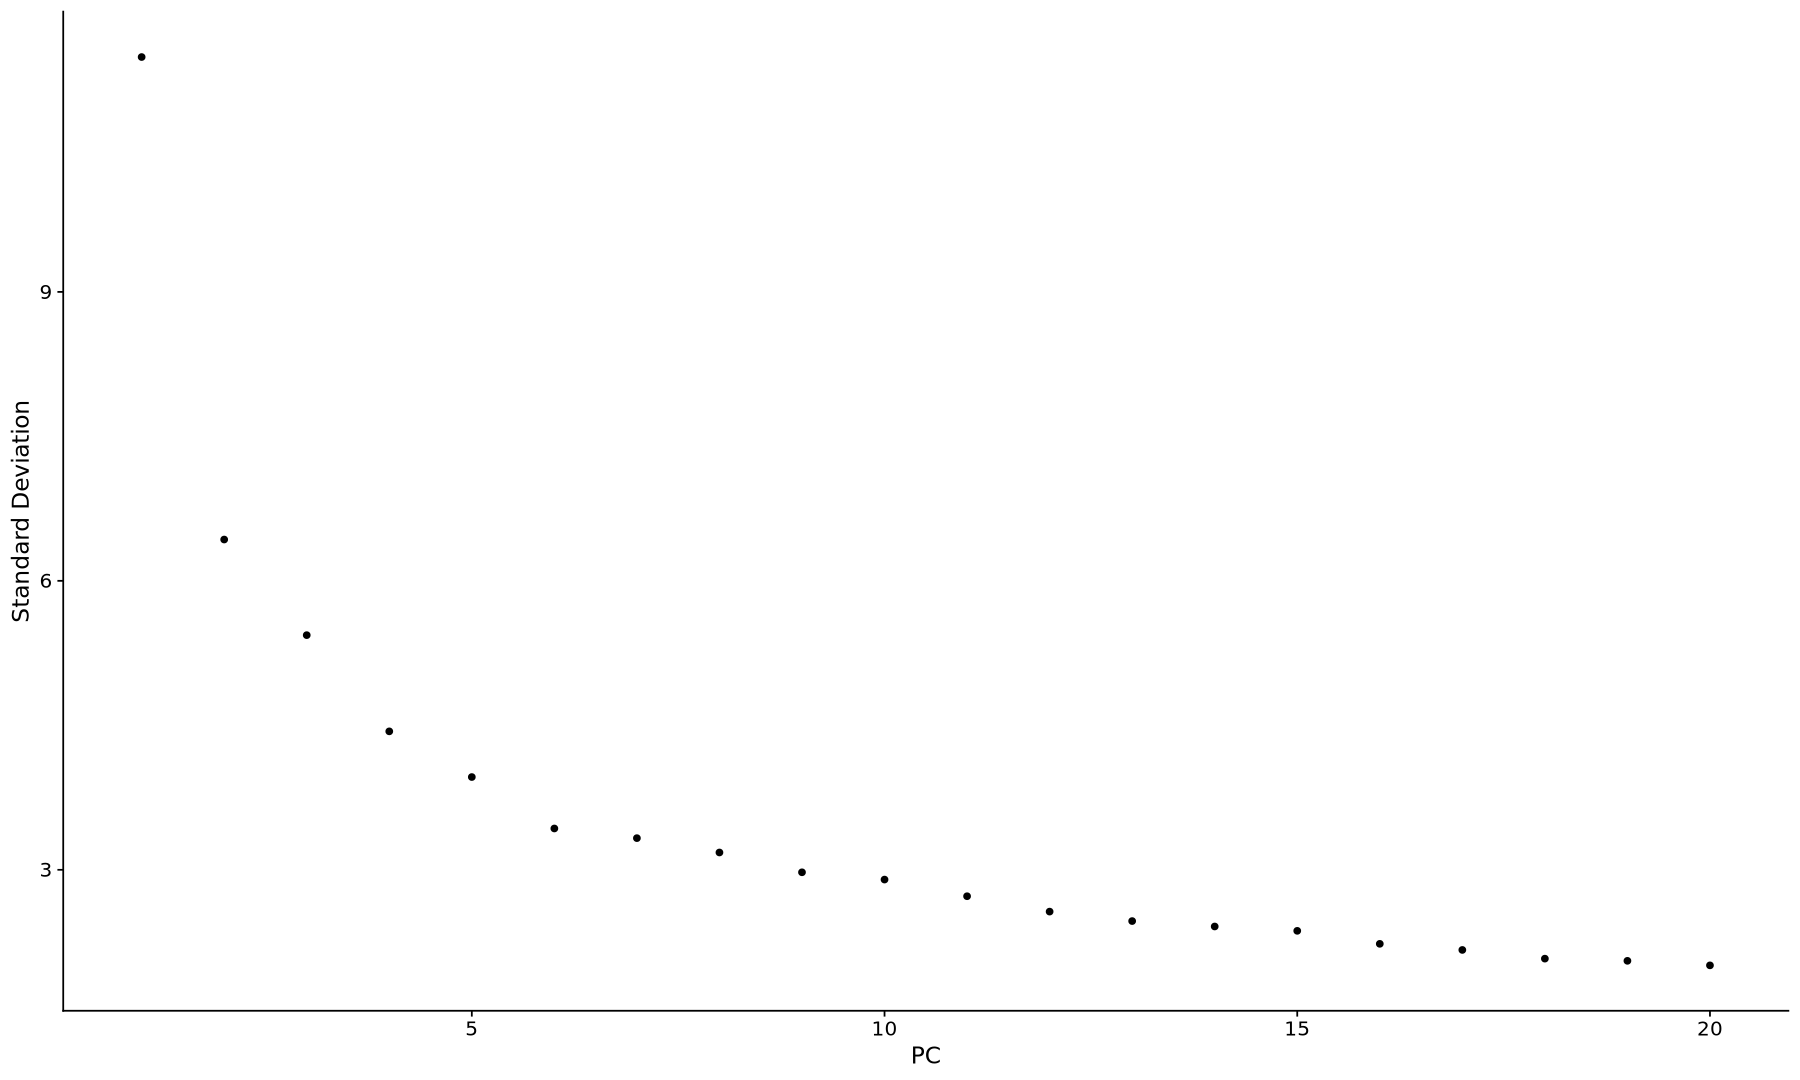

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11359
Number of edges: 368057

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8385
Number of communities: 13
Elapsed time: 1 seconds


1 singletons identified. 12 final clusters.

12:59:30 UMAP embedding parameters a = 0.9922 b = 1.112

12:59:30 Read 11359 rows and found 30 numeric columns

12:59:30 Using Annoy for neighbor search, n_neighbors = 30

12:59:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:59:31 Writing NN index file to temp file /tmp/RtmpuDkUCt/file15b066618b486

12:59:31 Searching Annoy index using 1 thread, search_k = 3000

12:59:34 Annoy recall = 100%

12:59:34 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:59:35 Initializing from normalized Laplacian + noise (using RSpectra)

12:59:35 Commencing optimization for 200 epochs, with 481466 positive edges

12:59:48 Optimization finished



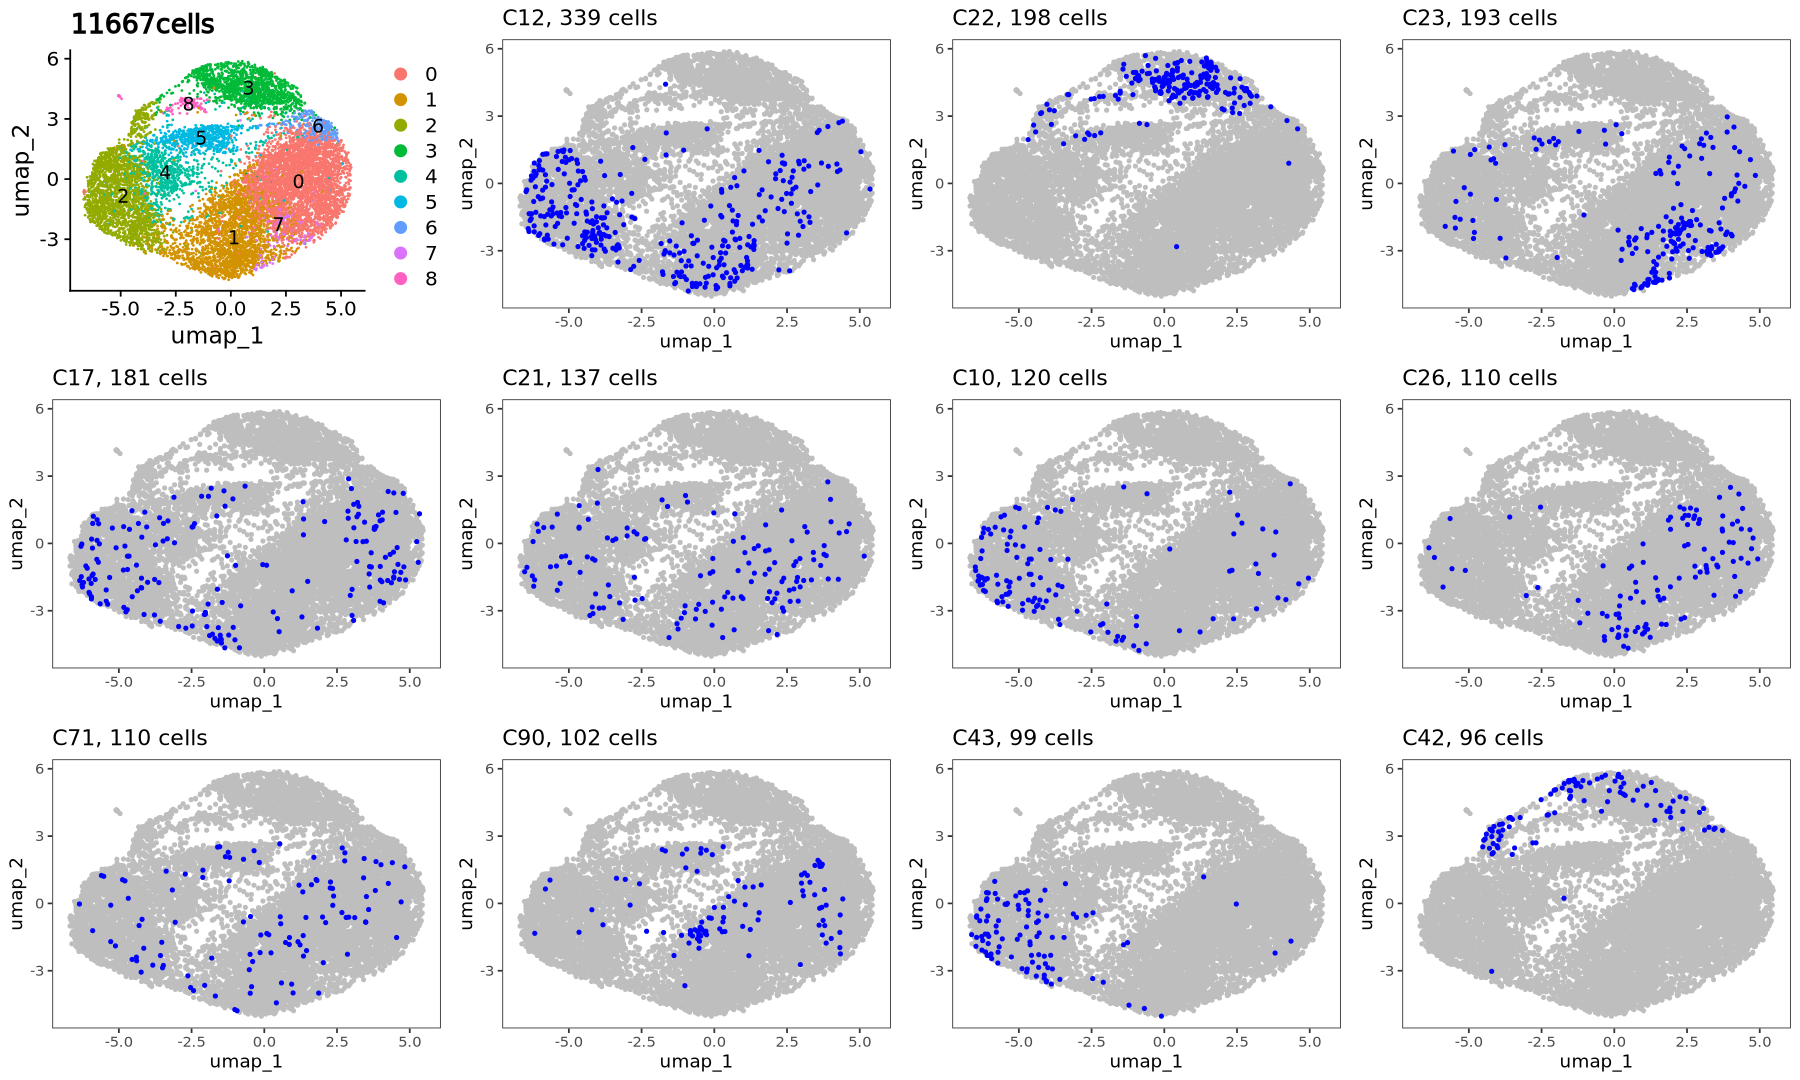

Normalizing layer: counts.a3030-2-10XSC3

Finding variable features for layer counts.a3030-2-10XSC3

Centering and scaling data matrix

PC_ 1 
Positive:  Lgals3, Ftl1, 2410006H16Rik, Gas5, 1110038B12Rik, Ero1l, Aqp5, Nupr1, Zfas1, Bsg 
	   Snhg12, Pgrmc1, Mt1, Hist1h1c, Gm42418, Cited2, Ndrg1, Ddit3, Snhg20, Rps15 
	   Rgcc, Thbs1, Hist1h2bc, Jund, 4930447F24Rik, Rpl38, Hilpda, Akr1c18, Dhrs3, Higd1a 
Negative:  Pclaf, Top2a, Birc5, Smc2, H2afz, Mki67, Cks1b, Hmgb1, Tk1, Diaph3 
	   Tyms, Ccna2, Tuba1b, Cdk1, Spc24, Hist1h1e, Tubb6, Smc4, AI506816, Hnrnpa2b1 
	   Ranbp1, Hmgb2, Hist1h2ap, Stmn1, Kif15, Ccnd1, Dek, Pola1, Srsf3, Kif4 
PC_ 2 
Positive:  Pde4d, Airn, Col4a5, Malat1, Pbx1, Myo1e, Atxn1, Gpc6, Mecom, Fndc3b 
	   Neat1, Cdk14, Pde7a, Lpp, Zfpm2, Slc7a2, Maml2, Maml3, Prune2, Plcb1 
	   Ptprm, Kalrn, Peak1, Tenm4, Cacnb2, Dennd1a, Cp, Prkca, Ldlrad4, Ank 
Negative:  Rps2, Birc5, Npm1, Ube2s, Tubb5, Ube2c, Ran, Cks2, Hmgb2, Cdca8 
	   Snhg1, Ccna2, Hint1, Cdk1, Cenpa, Ccnb1, N

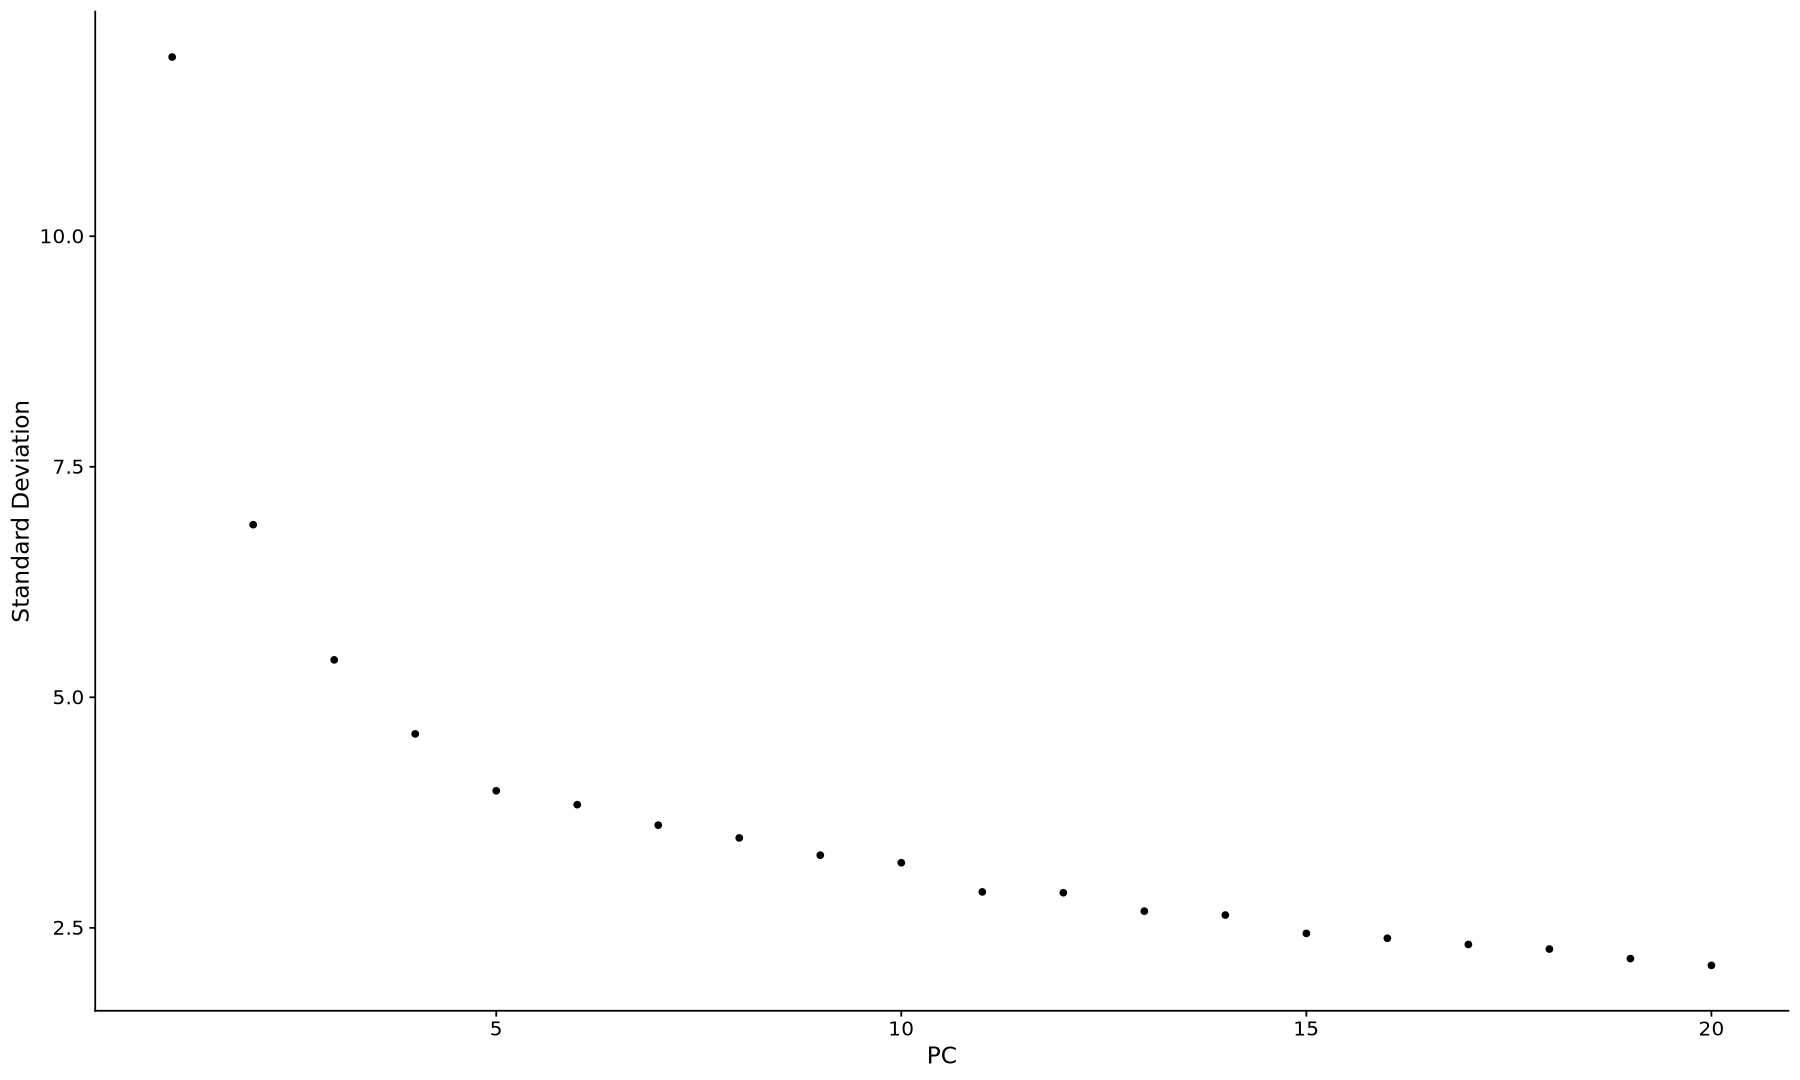

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11828
Number of edges: 385642

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8327
Number of communities: 12
Elapsed time: 1 seconds


13:00:46 UMAP embedding parameters a = 0.9922 b = 1.112

13:00:46 Read 11828 rows and found 30 numeric columns

13:00:46 Using Annoy for neighbor search, n_neighbors = 30

13:00:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:00:47 Writing NN index file to temp file /tmp/RtmpuDkUCt/file15b0642192dc5

13:00:47 Searching Annoy index using 1 thread, search_k = 3000

13:00:50 Annoy recall = 100%

13:00:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:00:52 Initializing from normalized Laplacian + noise (using RSpectra)

13:00:52 Commencing optimization for 200 epochs, with 507830 positive edges

13:01:05 Optimization finished



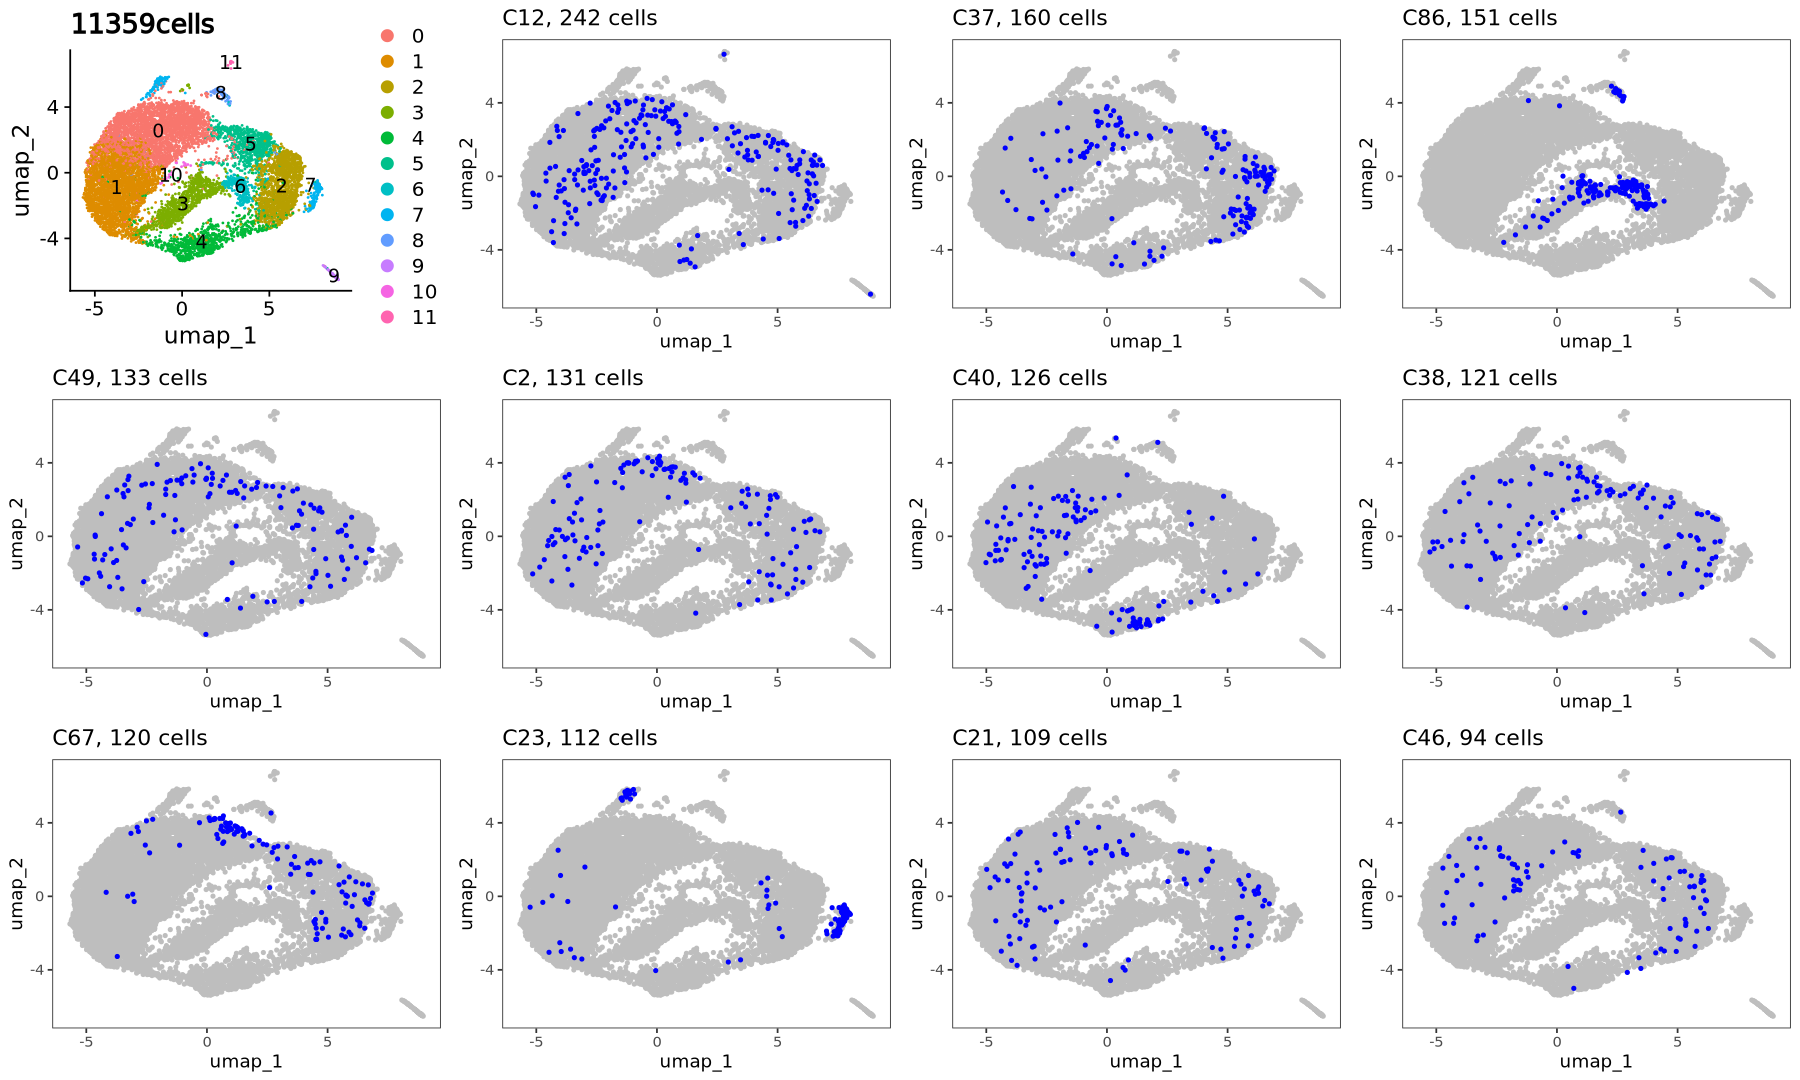

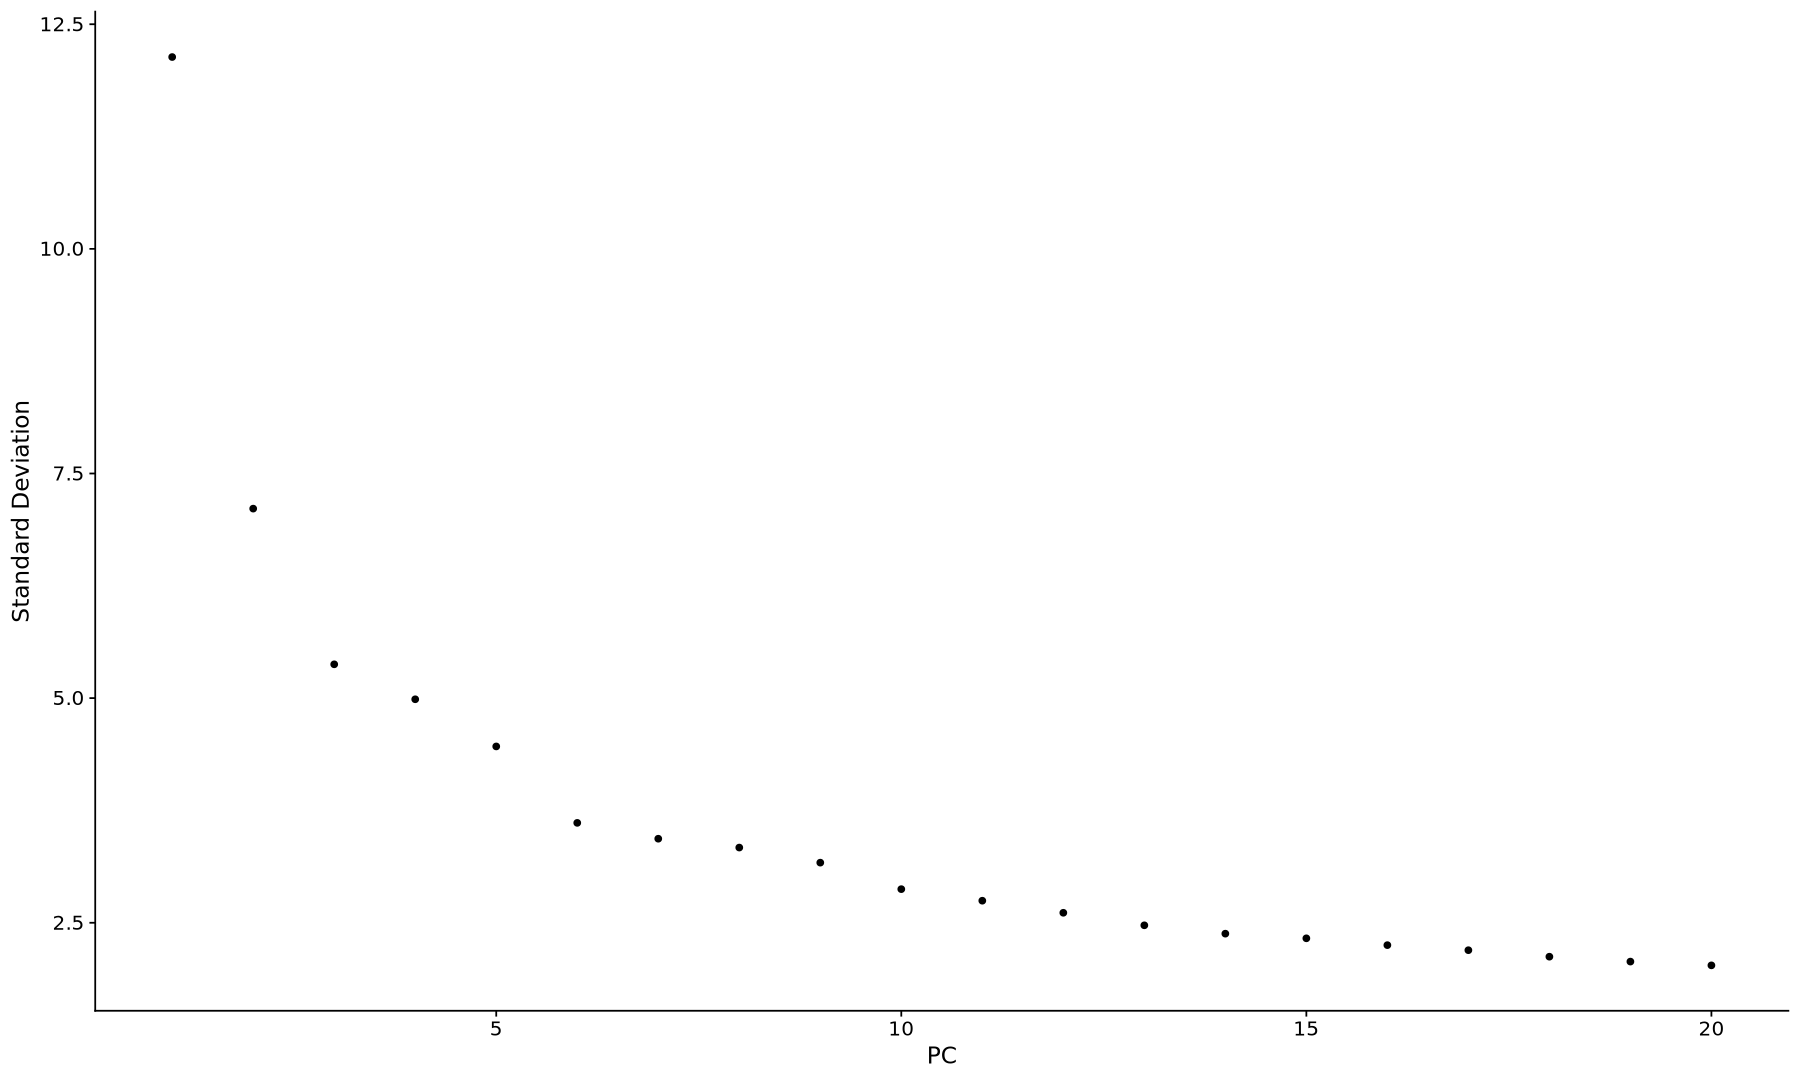

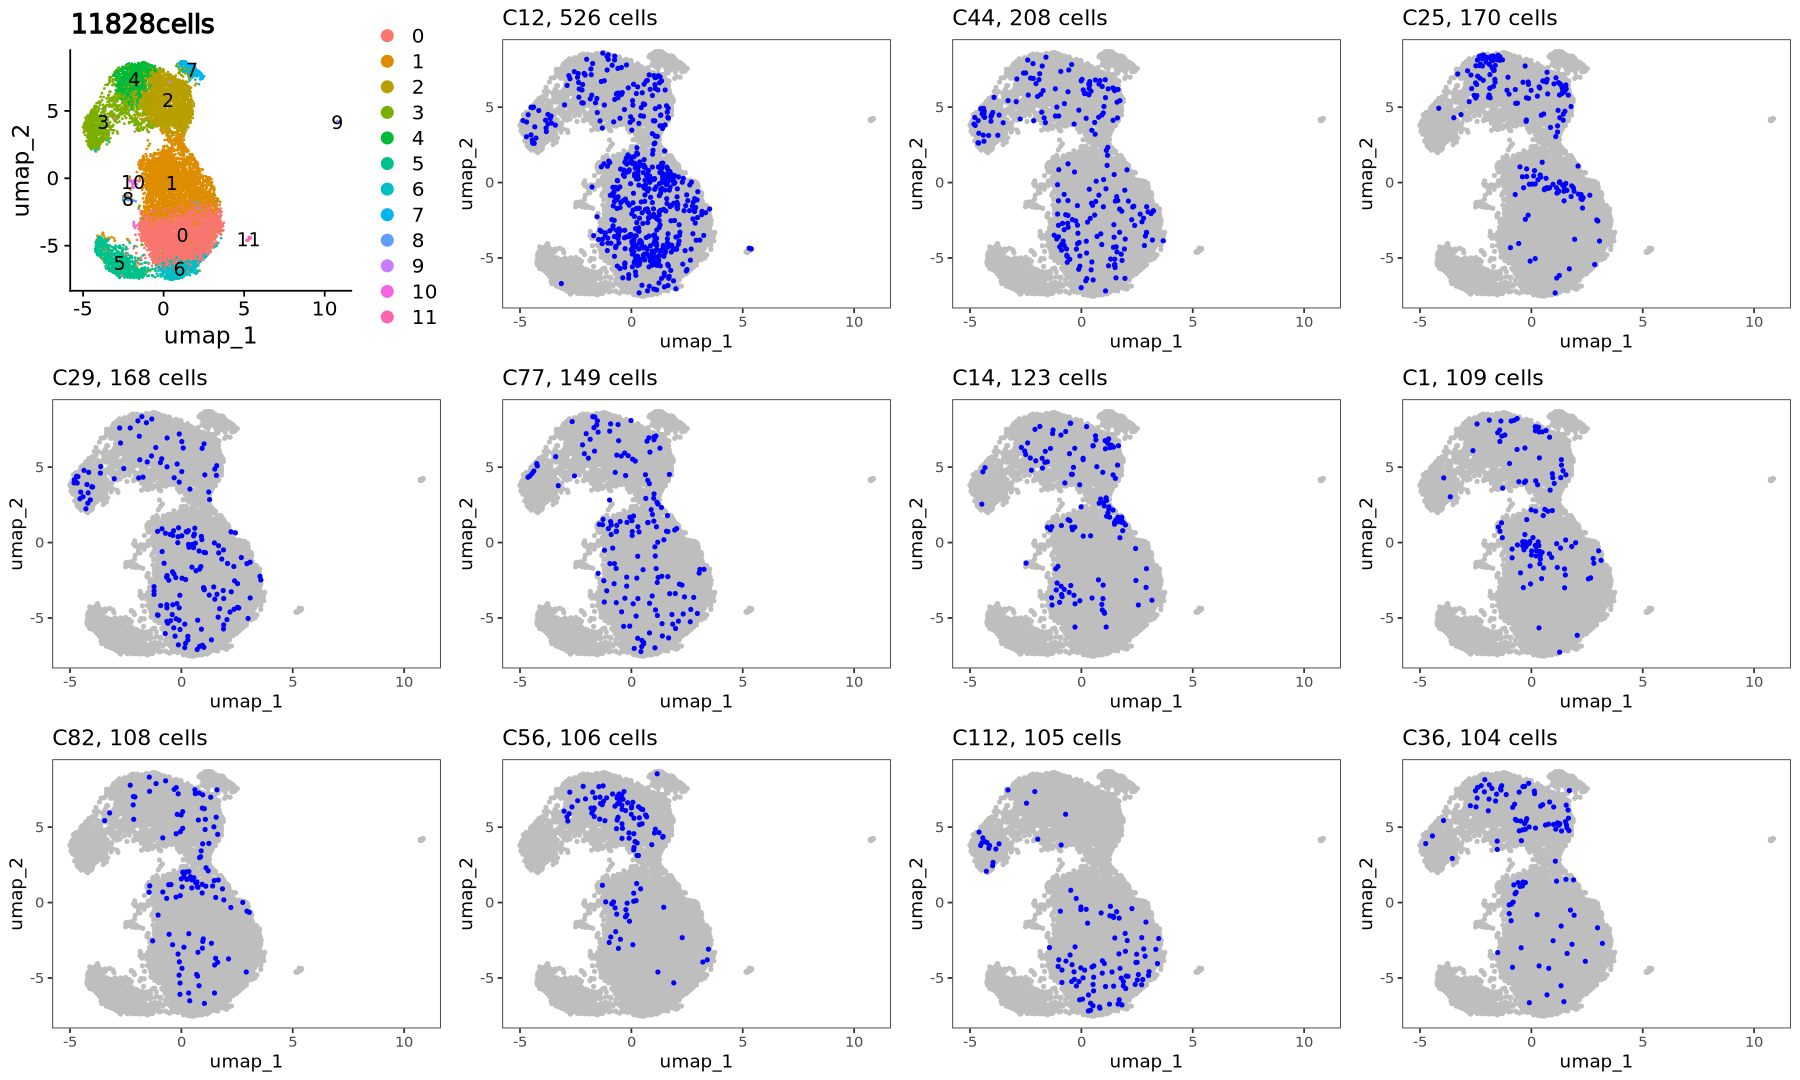

In [18]:
for (sample in c('T1_a3026','T1_a3028','T1_a3030')){
    sc <- subset(sc.T1,cells = rownames(sc.T1@meta.data)[sc.T1@meta.data$orig.ident==sample])
    
    set.seed(0)
    sc <- NormalizeData(sc)
    sc <- FindVariableFeatures(sc, selection.method = "vst", nfeatures = 2000)
    all.genes <- rownames(sc)
    sc <- ScaleData(sc, features = all.genes)
    sc <- RunPCA(sc,features = VariableFeatures(object = sc))
    plot <- ElbowPlot(sc)
    print(plot)
    sc <- FindNeighbors(sc, dims = 1:30)
    sc <- FindClusters(sc, resolution = 0.5)
    sc <- RunUMAP(sc, dims = 1:30)
    
    
    plot <- DimPlot(sc,label=TRUE) + ggtitle(paste0(dim(sc@meta.data)[1],'cells'))
    #print(plot)
    
    
    sc@meta.data$clone <- 'None'
    overlapped_cells <- intersect(rownames(cell_lineage),sc@meta.data$cellName)
    sc@meta.data[sc@meta.data$cellName %in% overlapped_cells,'clone'] <- as.character(cell_lineage[sc@meta.data$cellName[sc@meta.data$cellName %in% overlapped_cells],'lineageGrp'])

    library(gridExtra)
    library(ggpubr)
    library(ggplot2)

    sc@meta.data <- cbind(sc@meta.data,
                                        as.data.frame(sc@reductions$umap@cell.embeddings)[rownames(sc@meta.data),])
    plots <- list()
    plots[['umap']] <- plot
    clones <- names(sort(table(sc@meta.data$clone),decreasing = T))
    clones <- clones[clones!='None']
    for (clone in clones[1:11]){
        sc@meta.data$selected_clone <- 'Others'
        sc@meta.data[sc@meta.data$clone == clone,'selected_clone'] <- clone

        plot <- ggplot()+
            geom_point(data =sc@meta.data[sc@meta.data$selected_clone == 'Others',],aes(x=umap_1,y=umap_2),size=0.8,color='gray') + 
            geom_point(data =sc@meta.data[sc@meta.data$selected_clone != 'Others',],aes(x=umap_1,y=umap_2),size=0.8,color='blue') + 
            ggtitle(paste0('C',clone, ', ', length(which(sc@meta.data$selected_clone == clone)), ' cells')) + 
            theme_bw() + theme(panel.grid=element_blank())
            plots[[clone]] <- plot    

    }

    options(repr.plot.width = 15, repr.plot.height = 9)
    counter <- 1
    while (counter <= length(plots)) {
        current_plots <- plots[counter:min(counter + 11, length(plots))]
        grid.arrange(grobs = current_plots, ncol = 4)  
        counter <- counter + 12
    }    
    
}

# EE

## 1.load data & QC

In [169]:
library(Seurat)

In [170]:
samples <- c('a3026-1-1-10XSC3','a3028-3-1-10XSC3','a3030-2-1-10XSC3')
#subsamples <- c('CMO301','CMO302','CMO303','CMO304','CMO305','CMO306')

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


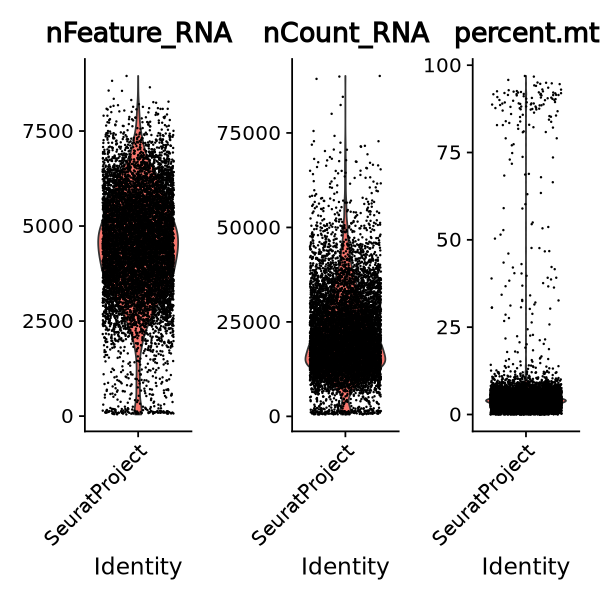

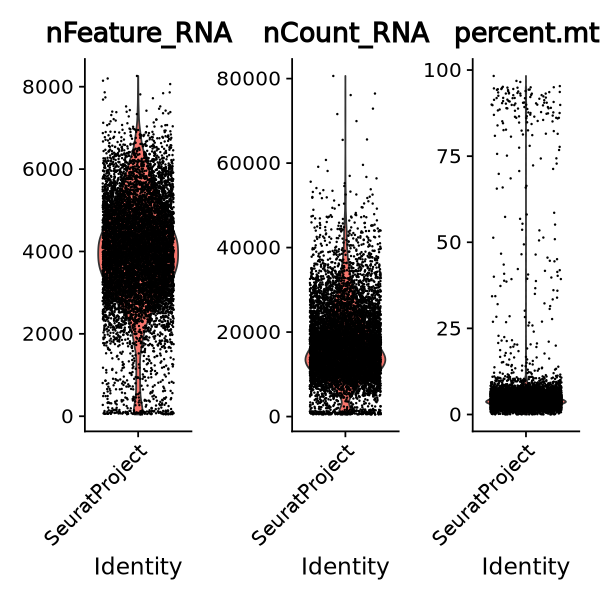

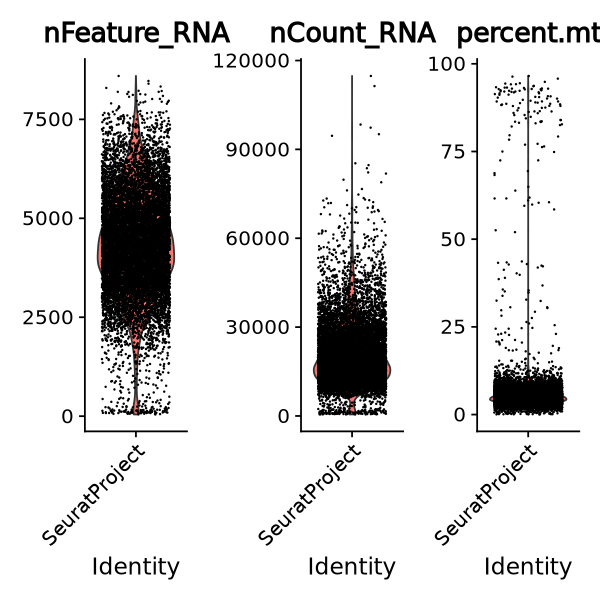

In [171]:
sc.all <- lapply(samples,function(sample){
    assignment_confidence <- read.table(paste0("/synology/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T2/",sample,"/outs/multi/multiplexing_analysis/assignment_confidence_table.csv"),
                       sep=',',header=T)

    assignment_confidence$Assignment_0.7 <- apply(assignment_confidence,1,function(x){
        if (any(as.numeric(x[2:3]) > 0.7)){
            return(names(x[2:3])[which(as.numeric(x[2:3]) > 0.7)])
        }else{
            return('unassigned')
        }
    })
    
    data_dir <- paste0("/synology/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T2/",sample,"/outs/multi/count/raw_feature_bc_matrix")
    sc.data <- Read10X(data.dir = data_dir)
    sc <- CreateSeuratObject(counts = sc.data$`Gene Expression`)
    sc <- subset(sc,cells=assignment_confidence$Barcode[assignment_confidence$Assignment_0.7!='unassigned'])
    rownames(assignment_confidence) <- assignment_confidence$Barcode
    sc@meta.data$Assignment_0.7 <- assignment_confidence[rownames(sc@meta.data),'Assignment_0.7']
    
    sc[["percent.mt"]] <- PercentageFeatureSet(sc,pattern = '^mt-')
    options(repr.plot.width = 5, repr.plot.height = 5)
    plot <- VlnPlot(sc,features=c("nFeature_RNA",'nCount_RNA','percent.mt'),ncol=3)
    print(plot)
    sc <- subset(sc, subset =nFeature_RNA > 1000 & nFeature_RNA < 7500 & percent.mt < 10)
    return(sc)
    
})

In [172]:
sc.all

[[1]]
An object of class Seurat 
32285 features across 9319 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

[[2]]
An object of class Seurat 
32285 features across 9194 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

[[3]]
An object of class Seurat 
32285 features across 10840 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts


## 2.preprocessing

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  Pclaf, Birc5, Tk1, Top2a, H2afz, Smc2, Cks1b, Hmgb2, Ccna2, Mki67 
	   Cdk1, Dut, Tyms, Dek, Spc24, Diaph3, Hmgb1, Gmnn, Smc4, Ran 
	   Rrm2, Ccnd1, Hmgb3, Racgap1, Cdca8, Tipin, Kif15, H2afx, Atad2, Hist1h1b 
Negative:  2410006H16Rik, Cebpb, Ndrg1, Aqp5, Cp, Nupr1, Bnip3, Hist1h2bc, Mt1, Cited2 
	   Pgk1, Dhrs3, Gadd45a, Cst3, Zfp36l1, 1110038B12Rik, Fn1, Ddit3, Gstm1, Crebrf 
	   Enpp2, Ppargc1a, Malat1, Hmox1, Jund, Itgb5, Col6a1, Hist1h1c, Ankrd37, Slc4a4 
PC_ 2 
Positive:  Rps2, Npm1, Snhg1, Pgk1, Lgals1, 2410006H16Rik, 1110038B12Rik, Ube2s, Hist1h4i, Tubb5 
	   Eif5a, Hint1, Snhg16, Ran, Ddit3, Selenoh, Nhp2, Actg1, Atp5h, Alyref 
	   Mt1, Cks2, Atf4, 5430416N02Rik, Cycs, Birc5, Snhg12, Upp1, Hmgb2, Gm45716 
Negative:  Zfpm2, Airn, Zbtb20, Camk2d, Gpc6, Cdk6, Fndc3b, Maml2, Lpp, Maml3 
	   Pbx1, Neat1, Ldlrad4, Ext1, Prkca, Nbea, Col4a5, Mecom, Celf2, Akt3 


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9319
Number of edges: 292565

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8322
Number of communities: 13
Elapsed time: 1 seconds


18:35:24 UMAP embedding parameters a = 0.9922 b = 1.112

18:35:24 Read 9319 rows and found 15 numeric columns

18:35:24 Using Annoy for neighbor search, n_neighbors = 30

18:35:24 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:35:24 Writing NN index file to temp file /tmp/RtmpUsiBYU/file5a2b2722bb7b2

18:35:24 Searching Annoy index using 1 thread, search_k = 3000

18:35:28 Annoy recall = 100%

18:35:28 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:35:30 Initializing from normalized Laplacian + noise (using RSpectra)

18:35:30 Commencing optimization for 500 epochs, with 379966 positive edges

18:35:58 Optimization finished

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9194
Number of edges: 277852

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8158
Number of communities: 10
Elapsed time: 1 seconds


18:36:47 UMAP embedding parameters a = 0.9922 b = 1.112

18:36:47 Read 9194 rows and found 15 numeric columns

18:36:47 Using Annoy for neighbor search, n_neighbors = 30

18:36:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:36:48 Writing NN index file to temp file /tmp/RtmpUsiBYU/file5a2b22f1cd6e2

18:36:48 Searching Annoy index using 1 thread, search_k = 3000

18:36:51 Annoy recall = 100%

18:36:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:36:53 Initializing from normalized Laplacian + noise (using RSpectra)

18:36:53 Commencing optimization for 500 epochs, with 372474 positive edges

18:37:20 Optimization finished

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data

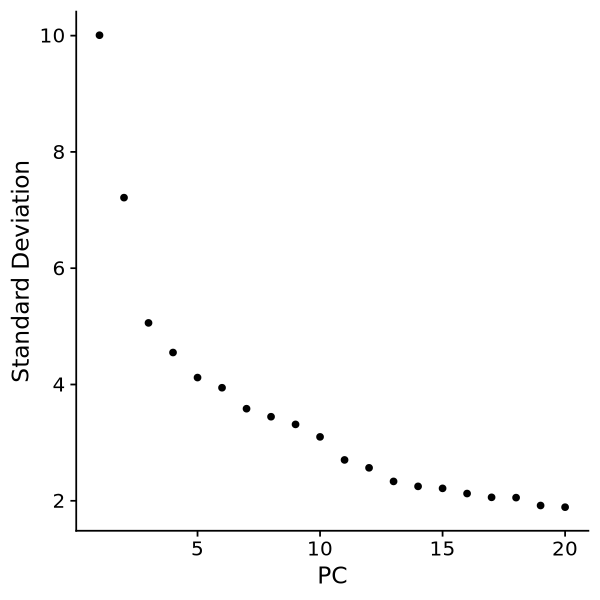

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10840
Number of edges: 340761

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8360
Number of communities: 11
Elapsed time: 1 seconds


18:38:21 UMAP embedding parameters a = 0.9922 b = 1.112

18:38:21 Read 10840 rows and found 15 numeric columns

18:38:21 Using Annoy for neighbor search, n_neighbors = 30

18:38:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:38:22 Writing NN index file to temp file /tmp/RtmpUsiBYU/file5a2b241e3cf49

18:38:22 Searching Annoy index using 1 thread, search_k = 3000

18:38:25 Annoy recall = 100%

18:38:26 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:38:27 Initializing from normalized Laplacian + noise (using RSpectra)

18:38:27 Commencing optimization for 200 epochs, with 449002 positive edges

18:38:41 Optimization finished



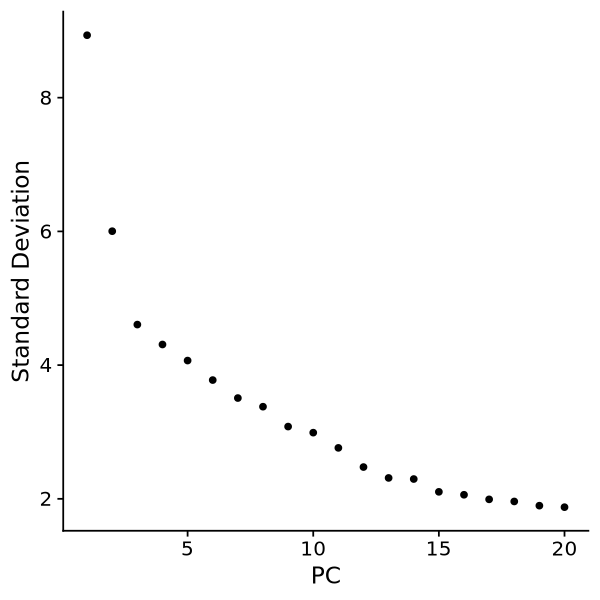

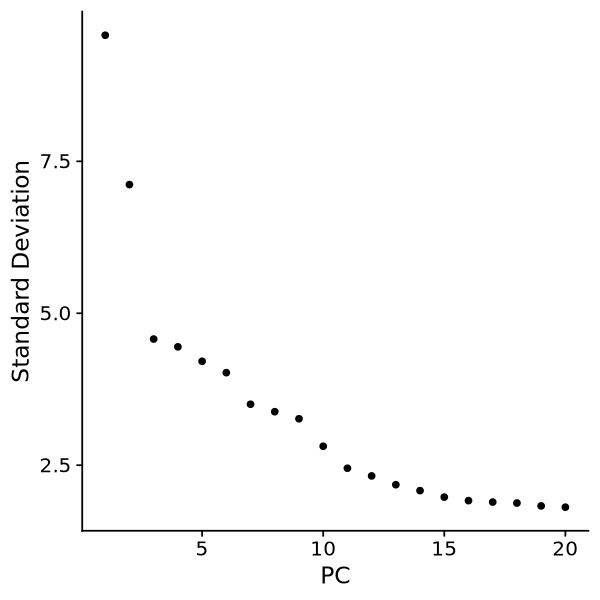

In [173]:
set.seed(0)
sc.all <- lapply(sc.all,function(sc){
    sc <- NormalizeData(sc)
    sc <- FindVariableFeatures(sc, selection.method = "vst", nfeatures = 2000)
    all.genes <- rownames(sc)
    sc <- ScaleData(sc, features = all.genes)
    sc <- RunPCA(sc,features = VariableFeatures(object = sc))
    plot <- ElbowPlot(sc)
    print(plot)
    sc <- FindNeighbors(sc, dims = 1:15)
    sc <- FindClusters(sc, resolution = 0.5)
    #sc <- RunTSNE(sc, dims = 1:15)
    sc <- RunUMAP(sc, dims = 1:15)
    return(sc)
})

## 3.remove doublet

In [174]:
library(DoubletFinder)

In [175]:
sc.all[[1]][["RNA"]] <- as(object = sc.all[[1]][["RNA"]], Class = "Assay")
sc.all[[2]][["RNA"]] <- as(object = sc.all[[2]][["RNA"]], Class = "Assay")
sc.all[[3]][["RNA"]] <- as(object = sc.all[[3]][["RNA"]], Class = "Assay")

Warning message:
“Assay RNA changing from Assay5 to Assay”
Warning message:
“Assay RNA changing from Assay5 to Assay”
Warning message:
“Assay RNA changing from Assay5 to Assay”


[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
NULL
[1] "Creating 3106 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



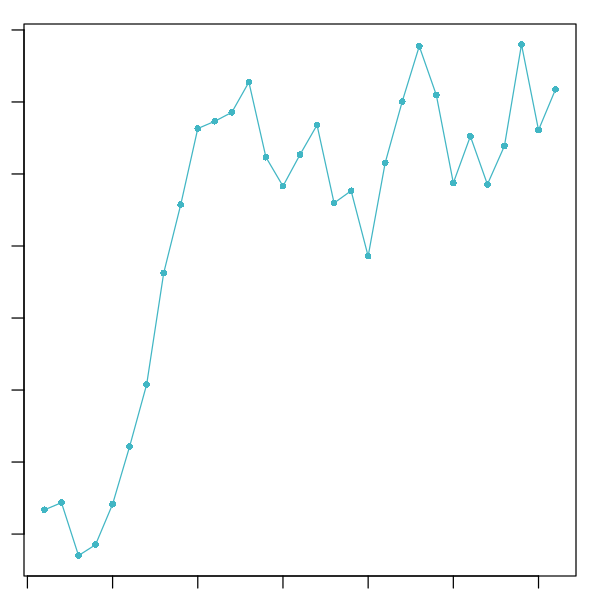

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
NULL
[1] "Creating 3065 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



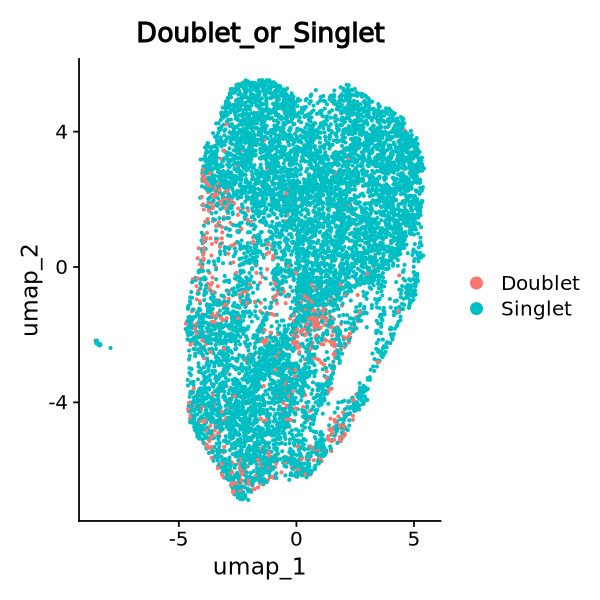

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



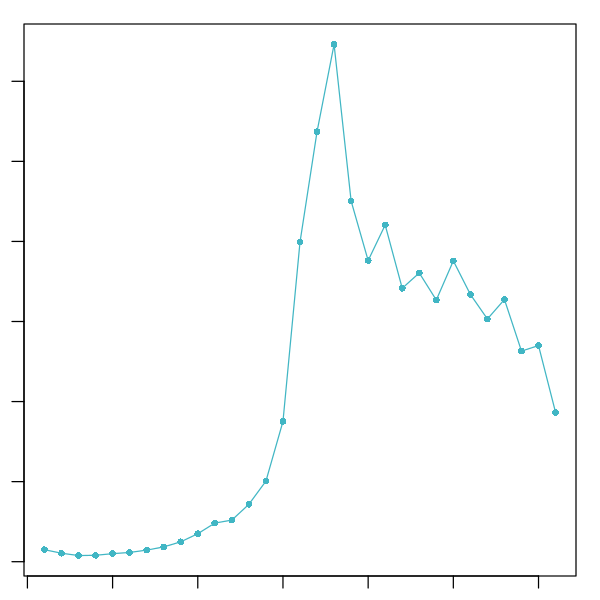

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
NULL
[1] "Creating 3613 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



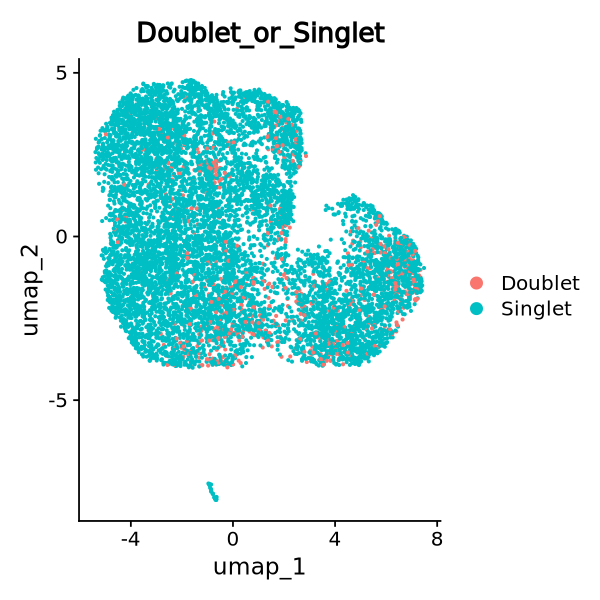

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


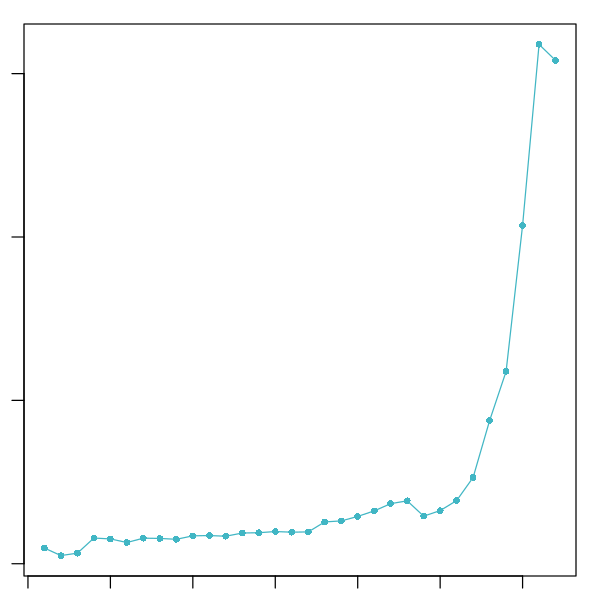

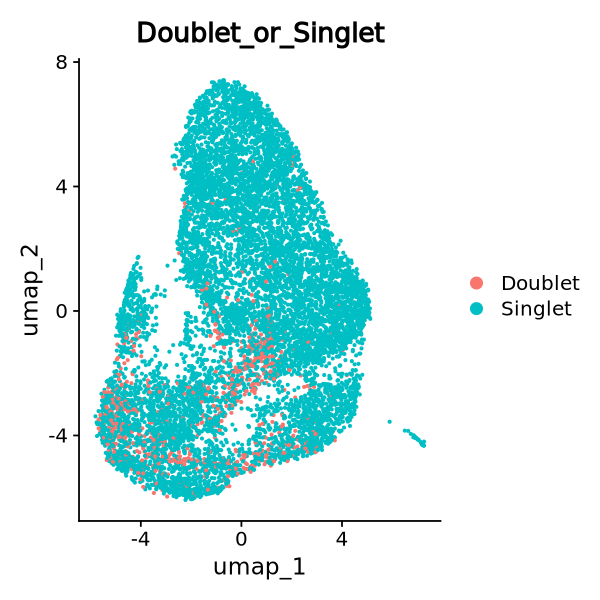

In [176]:
sc.all <- lapply(sc.all,function(sc){
    sweep.res.list <- paramSweep_v3(sc, PCs = 1:15, sct = FALSE)
    sweep.stats <- summarizeSweep(sweep.res.list, GT = FALSE)
    bcmvn <- find.pK(sweep.stats)
    mpK<-as.numeric(as.vector(bcmvn$pK[which.max(bcmvn$BCmetric)]))
    nExp_poi <- round(0.08*nrow(sc@meta.data)) 
    homotypic.prop <- modelHomotypic(sc@meta.data$seurat_clusters)  
    nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))
    sc <- doubletFinder_v3(sc, PCs = 1:15, pN = 0.25, pK = mpK, nExp = nExp_poi.adj, reuse.pANN = F, sct = FALSE)
    colnames(sc@meta.data)[ncol(sc@meta.data)] = "Doublet_or_Singlet"
    plot <- DimPlot(sc, reduction = "umap", group.by = 'Doublet_or_Singlet', pt.size = 0.5) 
    print(plot)   
    sc <- subset(sc,subset=Doublet_or_Singlet=="Singlet")
    return(sc)
})

In [177]:
sc.all

[[1]]
An object of class Seurat 
32285 features across 8653 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

[[2]]
An object of class Seurat 
32285 features across 8564 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

[[3]]
An object of class Seurat 
32285 features across 10081 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


## 4.merge

In [178]:
sc.all[[1]][["RNA"]] <- as(object = sc.all[[1]][["RNA"]], Class = "Assay5")
sc.all[[2]][["RNA"]] <- as(object = sc.all[[2]][["RNA"]], Class = "Assay5")
sc.all[[3]][["RNA"]] <- as(object = sc.all[[3]][["RNA"]], Class = "Assay5")


sc.all.merge <- merge(sc.all[[1]], 
                 y = sc.all[2:3], 
                 add.cell.ids = c('T2_a3026','T2_a3028','T2_a3030'), 
                 project = "sc_T2")

Warning message:
“Assay RNA changing from Assay to Assay5”
Warning message:
“Assay RNA changing from Assay to Assay5”
Warning message:
“Assay RNA changing from Assay to Assay5”


In [179]:
sc.all.merge

An object of class Seurat 
32285 features across 27298 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 9 layers present: data.1, data.2, data.3, counts.1, scale.data.1, counts.2, scale.data.2, counts.3, scale.data.3

In [180]:
saveRDS(sc.all.merge, file = "/synology/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T2/sc.all.merge.rds")

In [181]:
print('finished')

[1] "finished"


# LE

## 1.load data & QC

In [182]:
library(Seurat)

In [183]:
samples <- c('a3026-3-10XSC3','a3028-3-10XSC3','a3030-3-10XSC3')

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


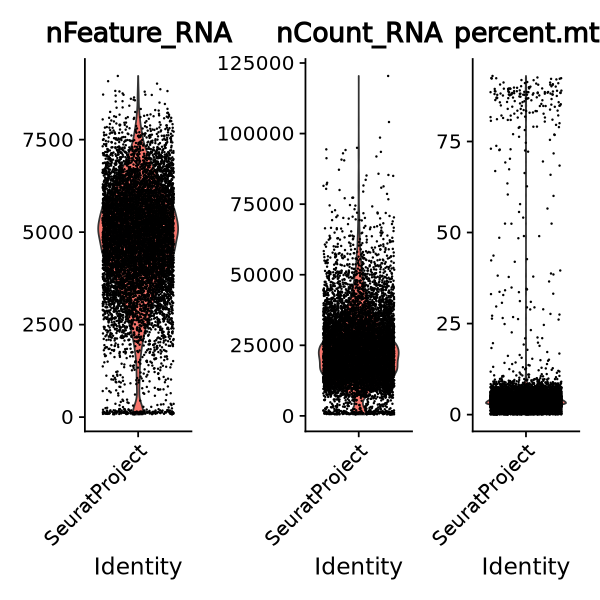

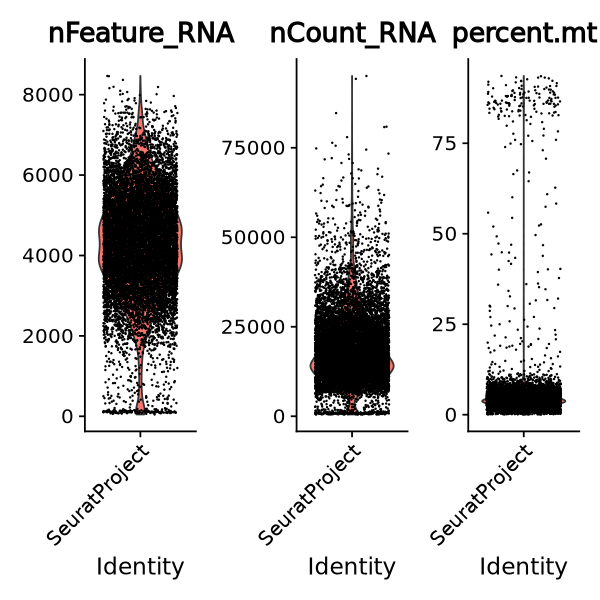

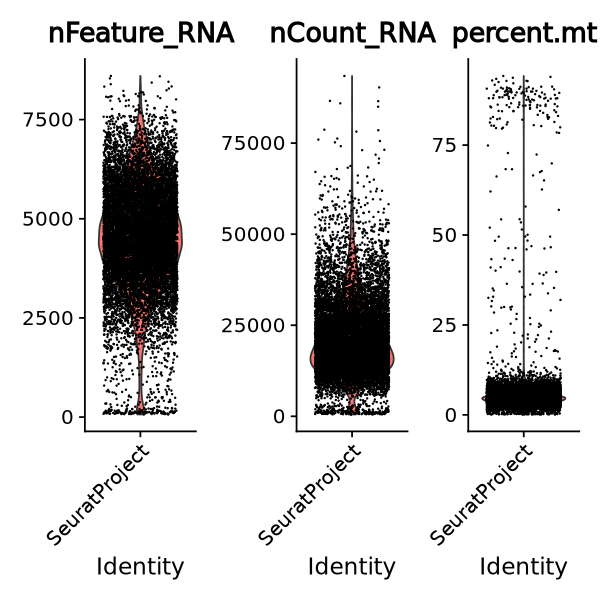

In [184]:
sc.all <- lapply(samples,function(sample){
    assignment_confidence <- read.table(paste0("/synology/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T3/",sample,"/outs/multi/multiplexing_analysis/assignment_confidence_table.csv"),
                       sep=',',header=T)

    assignment_confidence$Assignment_0.7 <- apply(assignment_confidence,1,function(x){
        if (any(as.numeric(x[2:3]) > 0.7)){
            return(names(x[2:3])[which(as.numeric(x[2:3]) > 0.7)])
        }else{
            return('unassigned')
        }
    })
    
    data_dir <- paste0("/synology/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T3/",sample,"/outs/multi/count/raw_feature_bc_matrix")
    sc.data <- Read10X(data.dir = data_dir)
    sc <- CreateSeuratObject(counts = sc.data$`Gene Expression`)
    sc <- subset(sc,cells=assignment_confidence$Barcode[assignment_confidence$Assignment_0.7!='unassigned'])
    rownames(assignment_confidence) <- assignment_confidence$Barcode
    sc@meta.data$Assignment_0.7 <- assignment_confidence[rownames(sc@meta.data),'Assignment_0.7']
    
    sc[["percent.mt"]] <- PercentageFeatureSet(sc,pattern = '^mt-')
    options(repr.plot.width = 5, repr.plot.height = 5)
    plot <- VlnPlot(sc,features=c("nFeature_RNA",'nCount_RNA','percent.mt'),ncol=3)
    print(plot)
    sc <- subset(sc, subset =nFeature_RNA > 1000 & nFeature_RNA < 7500 & percent.mt < 10)
    return(sc)
    
})

In [185]:
sc.all

[[1]]
An object of class Seurat 
32285 features across 9096 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

[[2]]
An object of class Seurat 
32285 features across 11152 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

[[3]]
An object of class Seurat 
32285 features across 11691 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts


## 2.preprocessing

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  Cp, Ndrg1, 2410006H16Rik, Lgals3, Pgk1, Mt1, Jund, Gas5, Nupr1, Zfas1 
	   Gstm1, Ppp3ca, Ero1l, Vamp5, Col6a2, Bcl2l11, Gm42418, Fos, Itgb5, P4ha1 
	   Chsy3, Zfp36l1, Igfbp7, Tcim, Rab13, Ifitm3, Mt2, Egr1, Kitl, Ppargc1a 
Negative:  Pclaf, Hmgb2, Smc2, Top2a, H2afz, Birc5, Racgap1, Cks1b, Ccna2, Dek 
	   Kif15, Cdk1, Hmgb1, Diaph3, Hist1h1b, Hist1h1e, Gmnn, Atad2, Prc1, Ccnd1 
	   Cenpf, Ranbp1, Cdca3, Plk4, Cenpe, Knl1, Srsf7, Mcm3, Mcm5, Anln 
PC_ 2 
Positive:  Zfpm2, Cdk14, Airn, Zbtb20, Cdk6, Maml2, Gpc6, Diaph2, Pbx1, Lpp 
	   Ppp3ca, Myh9, Pde4d, Zeb1, Col4a5, Runx1, Ext1, Col18a1, Peak1, Kirrel3 
	   Atxn1, Mecom, Nbea, Mast4, Tenm4, Bcas3, Celf2, Pde7a, Apbb2, 4930467D21Rik 
Negative:  Ftl1, Rps2, Eif4ebp1, Lgals3, Gas5, Higd1a, Snhg1, 2410006H16Rik, Psmb1, Actg1 
	   Tagln2, Eif5a, Vamp8, Pgk1, Snhg12, Hist1h4i, Krt18, Tmsb10, Ddit3, 5430416N02Rik 
	  

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9096
Number of edges: 292726

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8594
Number of communities: 8
Elapsed time: 0 seconds


19:33:53 UMAP embedding parameters a = 0.9922 b = 1.112

19:33:53 Read 9096 rows and found 15 numeric columns

19:33:53 Using Annoy for neighbor search, n_neighbors = 30

19:33:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:33:54 Writing NN index file to temp file /tmp/RtmpUsiBYU/file5a2b222fd8a6a

19:33:54 Searching Annoy index using 1 thread, search_k = 3000

19:33:57 Annoy recall = 100%

19:33:58 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:33:59 Initializing from normalized Laplacian + noise (using RSpectra)

19:33:59 Commencing optimization for 500 epochs, with 371282 positive edges

19:34:26 Optimization finished

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11152
Number of edges: 341560

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8290
Number of communities: 12
Elapsed time: 1 seconds


19:35:32 UMAP embedding parameters a = 0.9922 b = 1.112

19:35:32 Read 11152 rows and found 15 numeric columns

19:35:32 Using Annoy for neighbor search, n_neighbors = 30

19:35:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:35:33 Writing NN index file to temp file /tmp/RtmpUsiBYU/file5a2b244a649f8

19:35:33 Searching Annoy index using 1 thread, search_k = 3000

19:35:36 Annoy recall = 100%

19:35:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:35:38 Initializing from normalized Laplacian + noise (using RSpectra)

19:35:39 Commencing optimization for 200 epochs, with 450502 positive edges

19:35:52 Optimization finished

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling dat

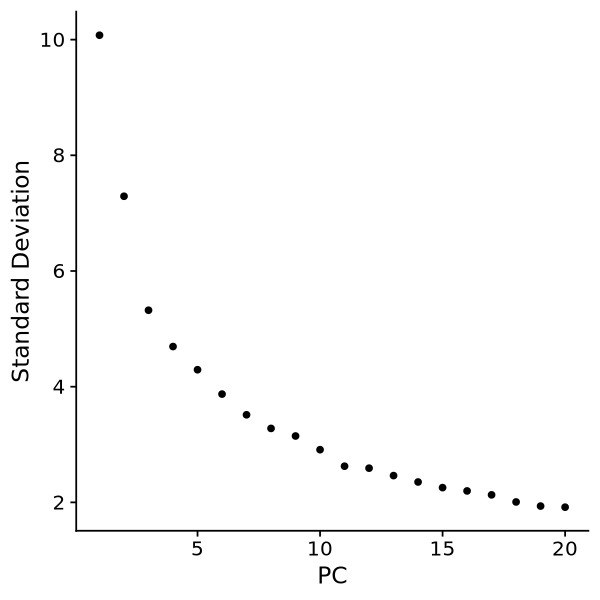

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11691
Number of edges: 366488

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8476
Number of communities: 9
Elapsed time: 1 seconds


19:37:03 UMAP embedding parameters a = 0.9922 b = 1.112

19:37:03 Read 11691 rows and found 15 numeric columns

19:37:03 Using Annoy for neighbor search, n_neighbors = 30

19:37:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:37:04 Writing NN index file to temp file /tmp/RtmpUsiBYU/file5a2b24246c32b

19:37:04 Searching Annoy index using 1 thread, search_k = 3000

19:37:07 Annoy recall = 100%

19:37:08 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:37:10 Initializing from normalized Laplacian + noise (using RSpectra)

19:37:10 Commencing optimization for 200 epochs, with 477620 positive edges

19:37:24 Optimization finished



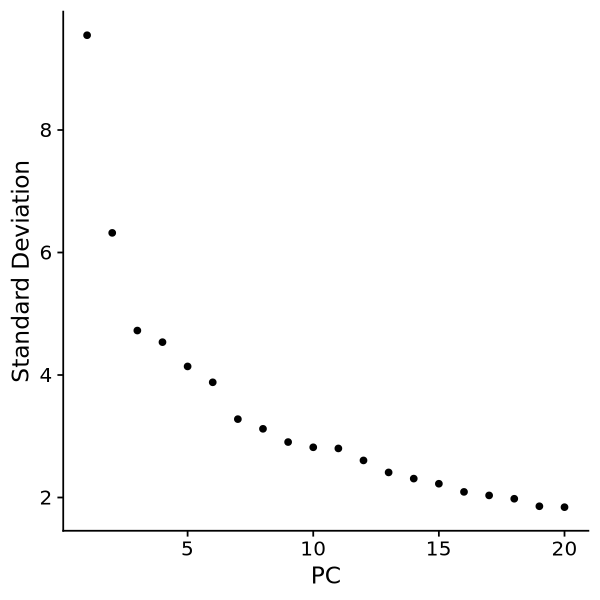

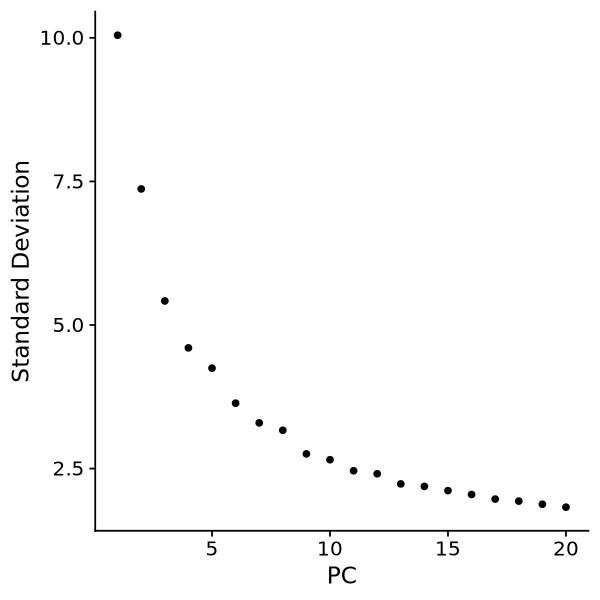

In [186]:
set.seed(0)
sc.all <- lapply(sc.all,function(sc){
    sc <- NormalizeData(sc)
    sc <- FindVariableFeatures(sc, selection.method = "vst", nfeatures = 2000)
    all.genes <- rownames(sc)
    sc <- ScaleData(sc, features = all.genes)
    sc <- RunPCA(sc,features = VariableFeatures(object = sc))
    plot <- ElbowPlot(sc)
    print(plot)
    sc <- FindNeighbors(sc, dims = 1:15)
    sc <- FindClusters(sc, resolution = 0.5)
    #sc <- RunTSNE(sc, dims = 1:15)
    sc <- RunUMAP(sc, dims = 1:15)
    return(sc)
})

## 3.remove doublet

In [187]:
library(DoubletFinder)

In [188]:
sc.all[[1]][["RNA"]] <- as(object = sc.all[[1]][["RNA"]], Class = "Assay")
sc.all[[2]][["RNA"]] <- as(object = sc.all[[2]][["RNA"]], Class = "Assay")
sc.all[[3]][["RNA"]] <- as(object = sc.all[[3]][["RNA"]], Class = "Assay")

Warning message:
“Assay RNA changing from Assay5 to Assay”
Warning message:
“Assay RNA changing from Assay5 to Assay”
Warning message:
“Assay RNA changing from Assay5 to Assay”


[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
NULL
[1] "Creating 3032 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



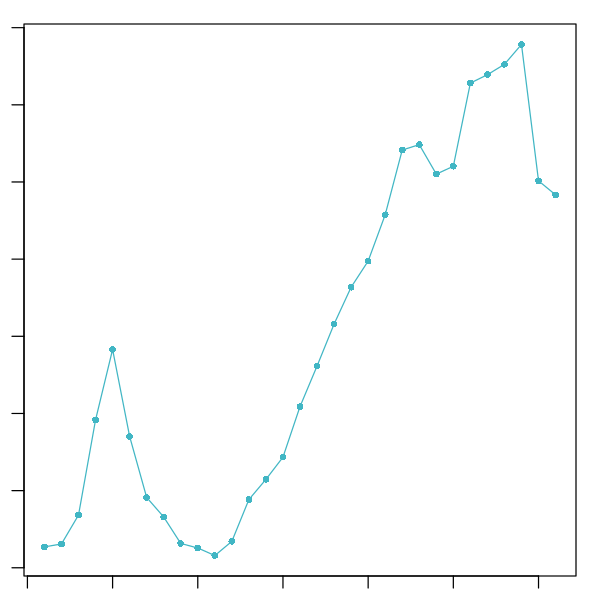

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
NULL
[1] "Creating 3717 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



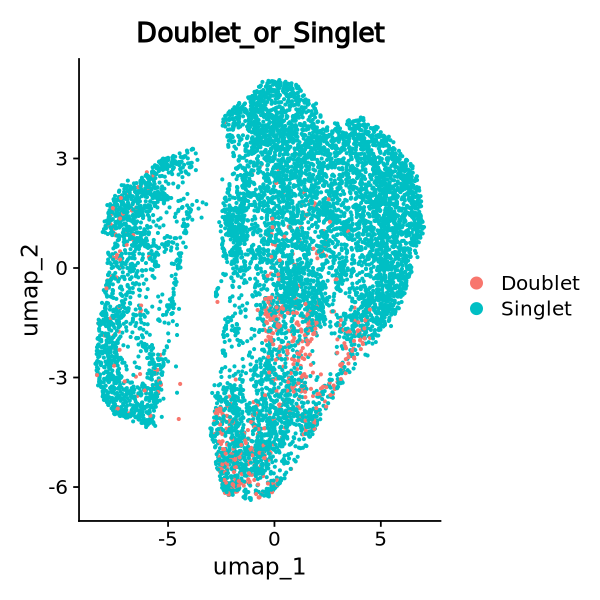

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



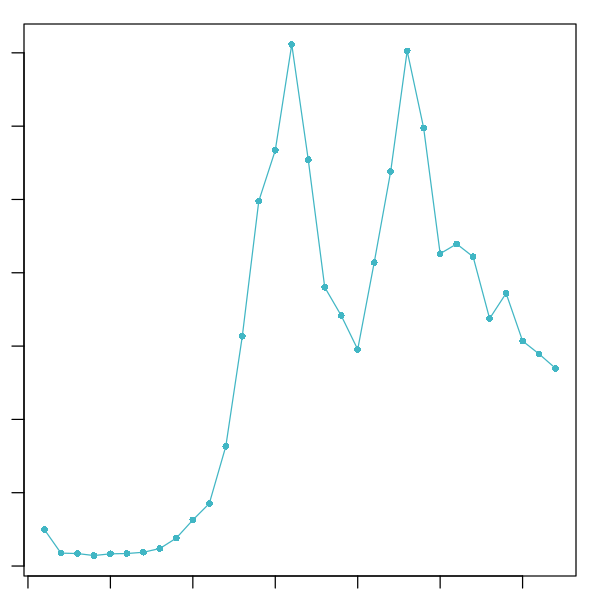

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
NULL
[1] "Creating 3897 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



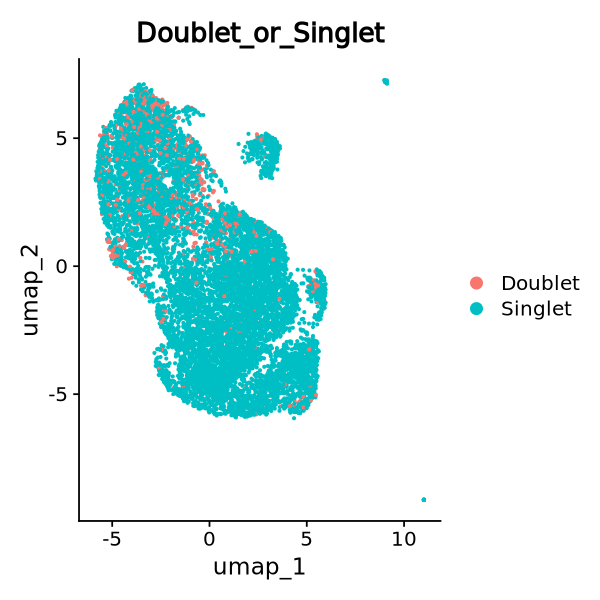

[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


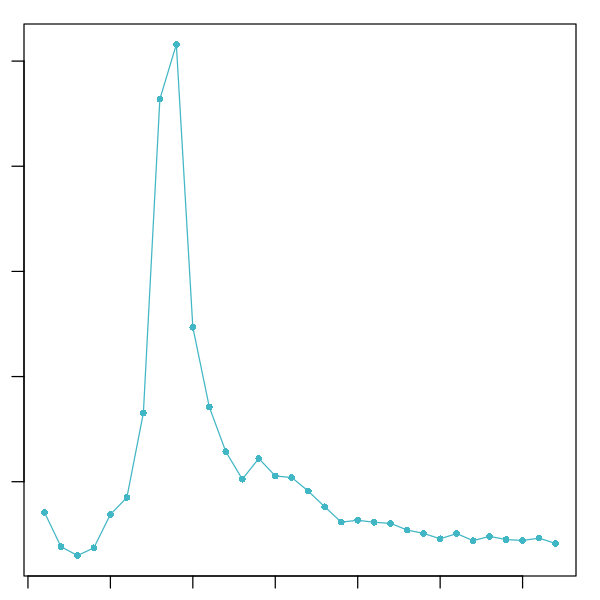

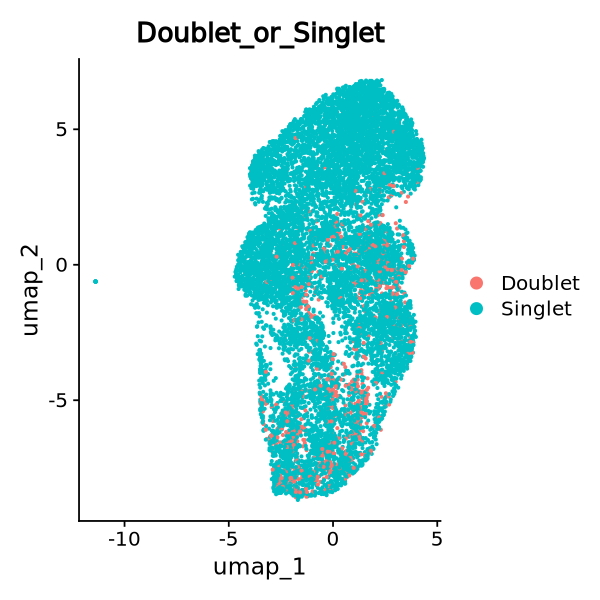

In [189]:
sc.all <- lapply(sc.all,function(sc){
    sweep.res.list <- paramSweep_v3(sc, PCs = 1:15, sct = FALSE)
    sweep.stats <- summarizeSweep(sweep.res.list, GT = FALSE)
    bcmvn <- find.pK(sweep.stats)
    mpK<-as.numeric(as.vector(bcmvn$pK[which.max(bcmvn$BCmetric)]))
    nExp_poi <- round(0.08*nrow(sc@meta.data)) 
    homotypic.prop <- modelHomotypic(sc@meta.data$seurat_clusters)  
    nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))
    sc <- doubletFinder_v3(sc, PCs = 1:15, pN = 0.25, pK = mpK, nExp = nExp_poi.adj, reuse.pANN = F, sct = FALSE)
    colnames(sc@meta.data)[ncol(sc@meta.data)] = "Doublet_or_Singlet"
    plot <- DimPlot(sc, reduction = "umap", group.by = 'Doublet_or_Singlet', pt.size = 0.5) 
    print(plot)   
    sc <- subset(sc,subset=Doublet_or_Singlet=="Singlet")
    return(sc)
})

In [190]:
sc.all

[[1]]
An object of class Seurat 
32285 features across 8484 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

[[2]]
An object of class Seurat 
32285 features across 10381 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

[[3]]
An object of class Seurat 
32285 features across 10893 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


## 4.merge

In [191]:
sc.all[[1]][["RNA"]] <- as(object = sc.all[[1]][["RNA"]], Class = "Assay5")
sc.all[[2]][["RNA"]] <- as(object = sc.all[[2]][["RNA"]], Class = "Assay5")
sc.all[[3]][["RNA"]] <- as(object = sc.all[[3]][["RNA"]], Class = "Assay5")

sc.all.merge <- merge(sc.all[[1]], 
                 y = sc.all[2:3], 
                 add.cell.ids = c('T3_a3026','T3_a3028','T3_a3030'), 
                 project = "sc_T3")

Warning message:
“Assay RNA changing from Assay to Assay5”
Warning message:
“Assay RNA changing from Assay to Assay5”
Warning message:
“Assay RNA changing from Assay to Assay5”


In [192]:
sc.all.merge

An object of class Seurat 
32285 features across 29758 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 9 layers present: data.1, data.2, data.3, counts.1, scale.data.1, counts.2, scale.data.2, counts.3, scale.data.3

In [193]:
saveRDS(sc.all.merge, file = "/synology/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T3/sc.all.merge.rds")

In [194]:
print('finished')

[1] "finished"
